In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
import matplotlib as mpl

unidf=pd.read_csv(r"C:\Users\hajar\Time-Series-Crime-Forecasting-Minneapolis-3\data\Univ_Date.csv")

## SARIMA
1. Split the data into a train and test using time-based splitting
2. Check Assumptions and make corrections if needed
3. Select ARIMA Model
4. Select Best ARIMA Model
4. Interpret

### Split Data

Partition the data set into 4 parts corresponding to 2019-2024. then create nested training sets.

In [517]:
#Validation Set

#sort Data
unidf=unidf.set_index('Date')
unidf=unidf.sort_index()

unidf.reset_index()
unidf['date']=unidf.index
unidf['date'] = pd.to_datetime(unidf['date'], format='%Y-%m-%d')
unidf

Crime_Count       date
Date                              
2019-01-01           88 2019-01-01
2019-01-02          102 2019-01-02
2019-01-03          133 2019-01-03
2019-01-04           95 2019-01-04
2019-01-05           83 2019-01-05
...                 ...        ...
2025-03-06           89 2025-03-06
2025-03-07           89 2025-03-07
2025-03-08           70 2025-03-08
2025-03-09           80 2025-03-09
2025-03-10           50 2025-03-10

[2261 rows x 2 columns]

In [518]:
#Divide Data into 4 pairs of train and test sets

#SET1:
train1_range = pd.date_range(start='2019-3-1', end='2020-2-29')
train1 = unidf[unidf['date'].isin(train1_range)]

test_range = pd.date_range(start='2019-3-1', end='2020-2-29')
test1 = unidf[(unidf['date'].dt.year ==2020 ) & (unidf['date'].dt.month ==3)]


#SET2:
train2_range = pd.date_range(start='2020-3-1', end='2021-2-28')
train2 = unidf[unidf['date'].isin(train2_range)]
test2 = unidf[(unidf['date'].dt.year ==2021 ) & (unidf['date'].dt.month ==3)]


#SET3:
train3_range = pd.date_range(start='2021-3-1', end='2022-2-28')
train3 = unidf[unidf['date'].isin(train3_range)]
test3 = unidf[(unidf['date'].dt.year ==2022 ) & (unidf['date'].dt.month ==3)]


#SET4:
train4_range = pd.date_range(start='2022-3-1', end='2023-2-28')
train4 = unidf[unidf['date'].isin(train4_range)]
test4 = unidf[(unidf['date'].dt.year ==2023 ) & (unidf['date'].dt.month ==3)]


#SET5:
train5_range = pd.date_range(start='2023-3-1', end='2024-3-29')
train5 = unidf[unidf['date'].isin(train5_range)]
test5 = unidf[(unidf['date'].dt.year ==2024 ) & (unidf['date'].dt.month ==3)]




## STEP 1: Set 1 March 2020 Test
### Checking Stationarity


Text(0, 0.5, '\nNumber of Reported Crimes\n')

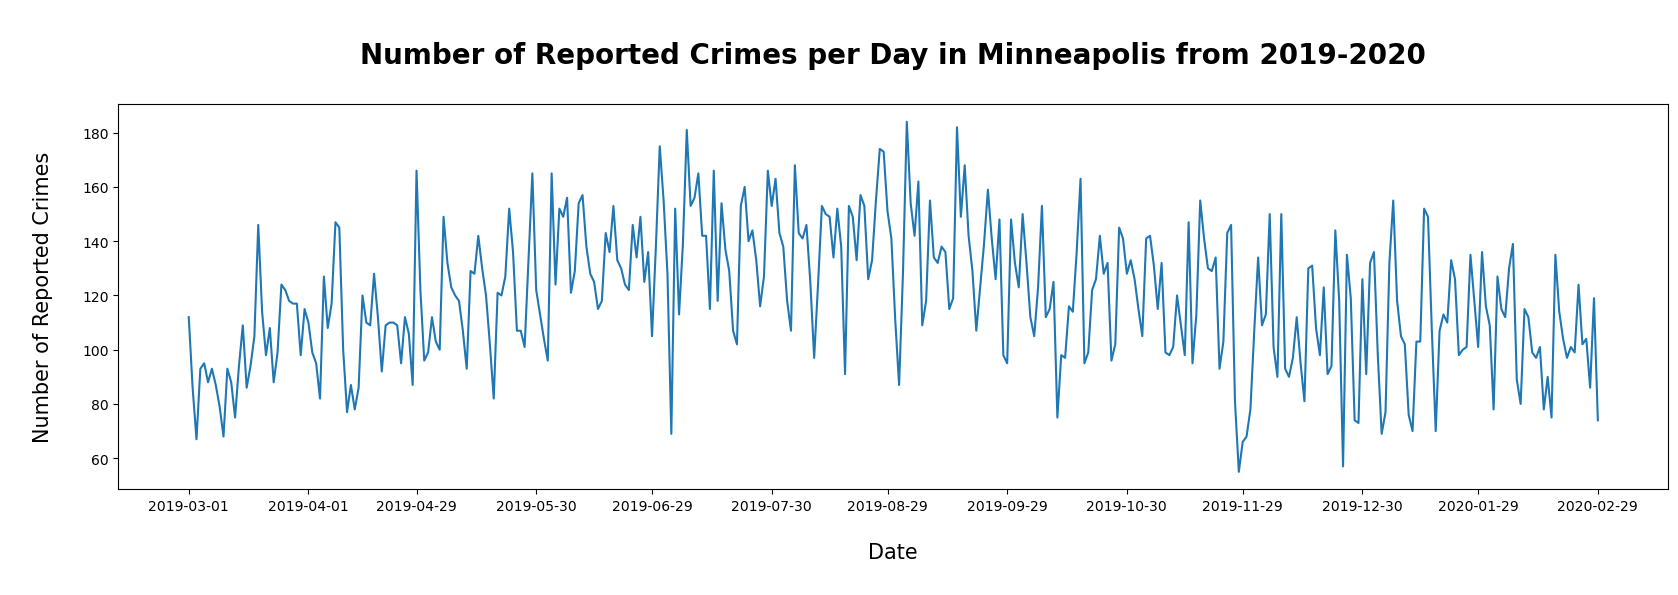

In [519]:
#Look at plot
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train1.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



In [520]:
#ADF Test
# Perform Augmented Dickey-Fuller test
result = adfuller(train1['Crime_Count'])

# Extract and print the test statistics and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -2.1650656173778726
P-value: 0.2191679740788734


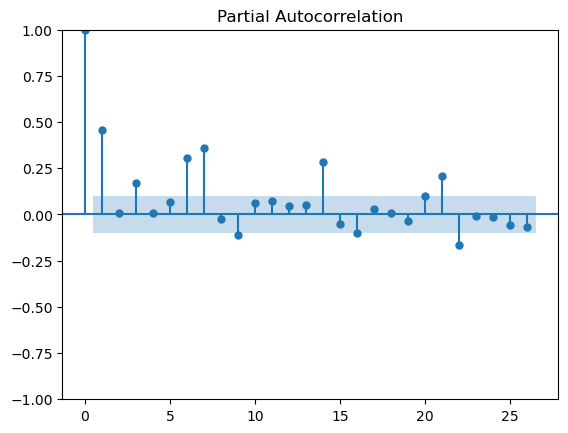

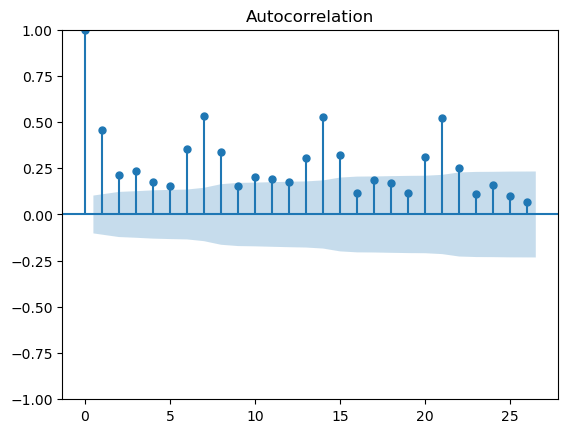

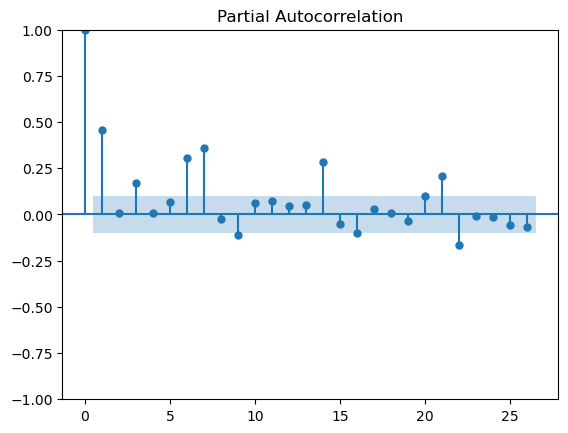

In [521]:
#ACF
plot_acf(train1.Crime_Count.dropna())
#PACF
plot_pacf(train1.Crime_Count.dropna())

### Check for Seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

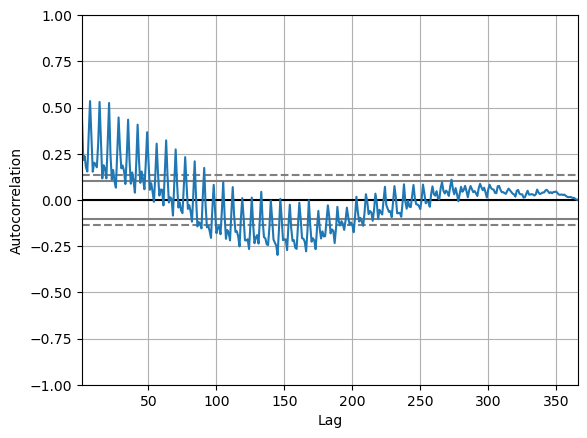

In [522]:
#Autocorrelation
autocorrelation_plot(train1['Crime_Count'])

KeyboardInterrupt: 

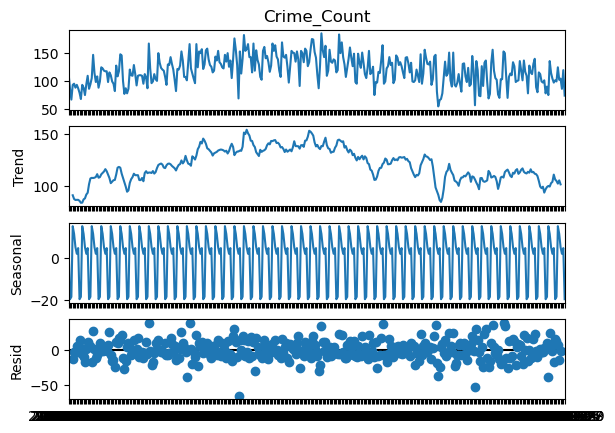

In [523]:
decomposition=seasonal_decompose(train1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train1), 100))
plt.show()

### Seasonal Differencing

In [ ]:
train1s1= train1.copy()
train1s1['Crime_Count']=train1['Crime_Count'] - train1['Crime_Count'].shift(7)


In [ ]:
train1s1=train1s1.dropna()
train1s1

Crime_Count       date
Date                              
2019-03-08        -25.0 2019-03-08
2019-03-09         -7.0 2019-03-09
2019-03-10          1.0 2019-03-10
2019-03-11          0.0 2019-03-11
2019-03-12         -7.0 2019-03-12
...                 ...        ...
2020-02-25        -33.0 2020-02-25
2020-02-26        -10.0 2020-02-26
2020-02-27        -18.0 2020-02-27
2020-02-28         22.0 2020-02-28
2020-02-29        -27.0 2020-02-29

[359 rows x 2 columns]

Text(0, 0.5, '\nNumber of Reported Crimes\n')

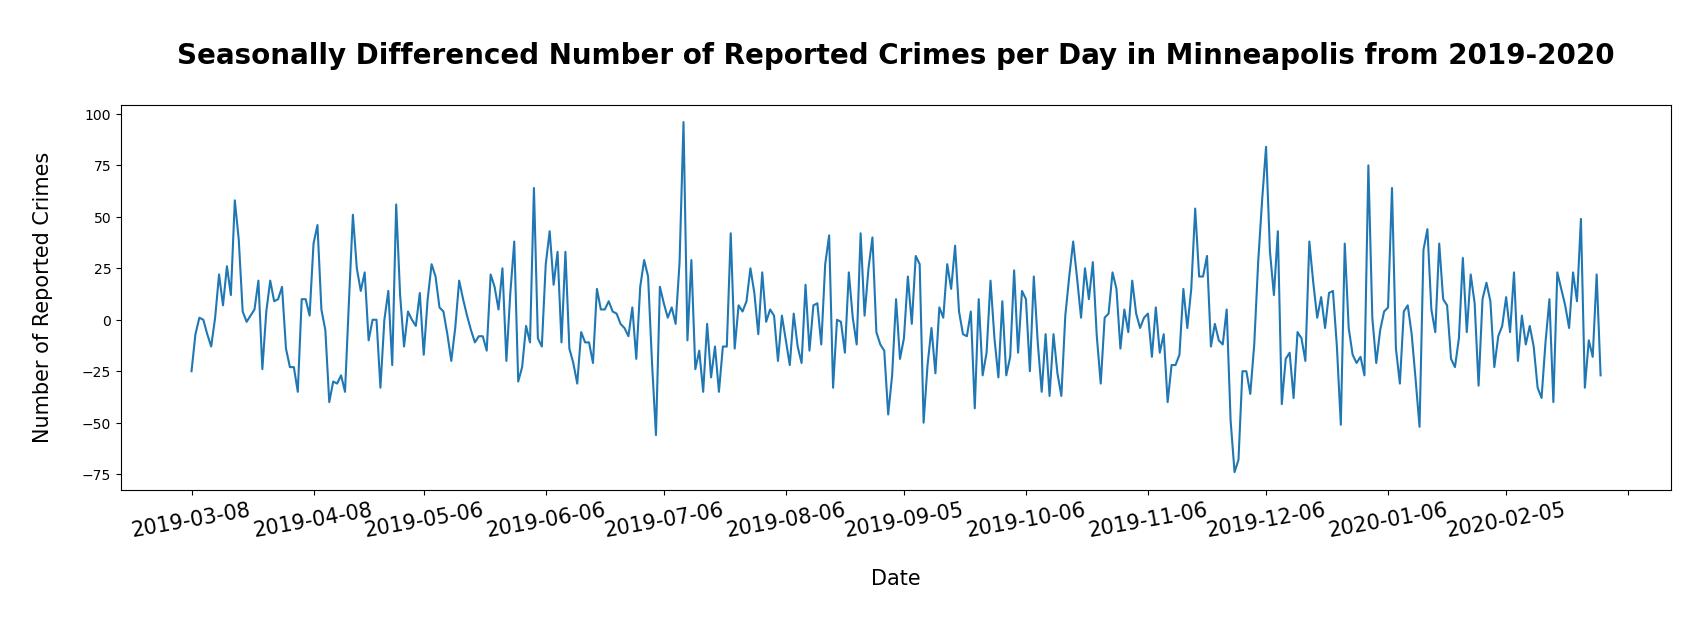

In [ ]:
#Look at plot

fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train1s1.Crime_Count); 
plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nSeasonally Differenced Number of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})

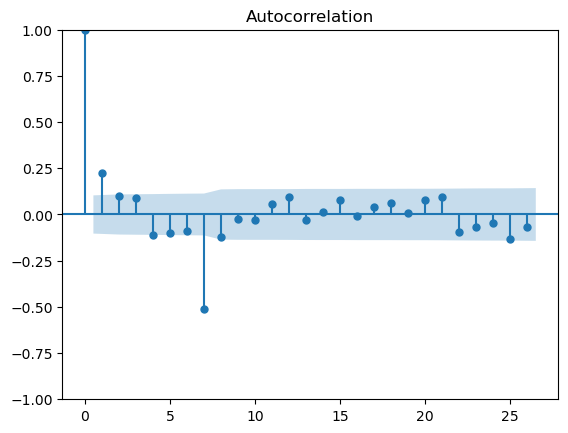

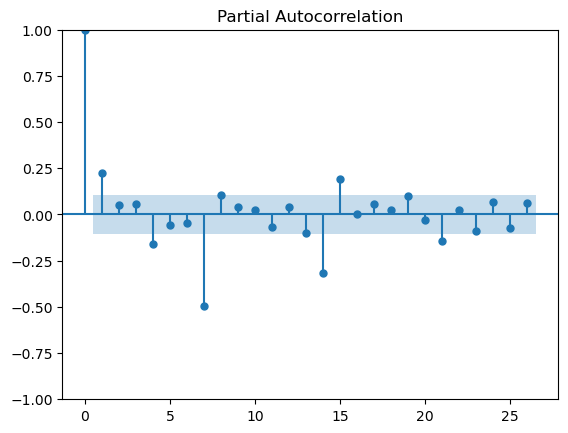

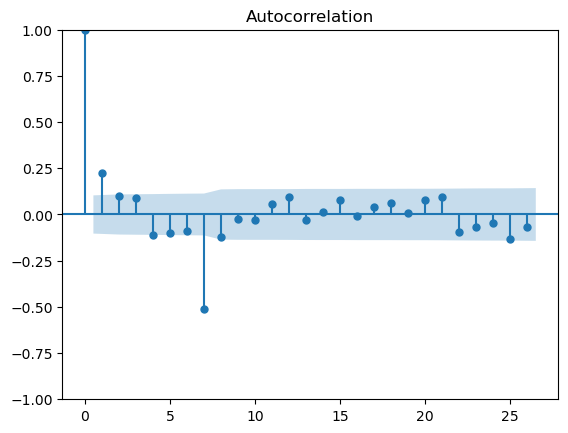

In [ ]:
plot_pacf(train1s1.Crime_Count)
plot_acf(train1s1.Crime_Count)

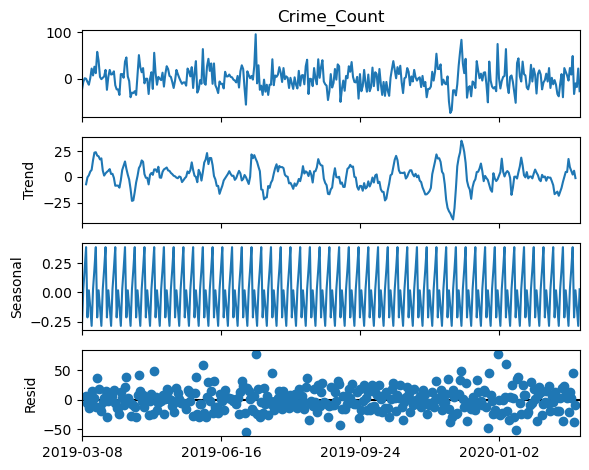

In [ ]:
# Trying Differencing of 7
decomposition=seasonal_decompose(train1s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train1), 100))
plt.show()

In [ ]:
#ADF Test

# Perform Augmented Dickey-Fuller test
result = adfuller(train1s1['Crime_Count'])

# Extract and print the test statistics and p-value
test_statistic = result[0]
p_value = result[1]
print(f"Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

Test Statistic: -6.484784506463984
P-value: 1.2688298362252203e-08


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

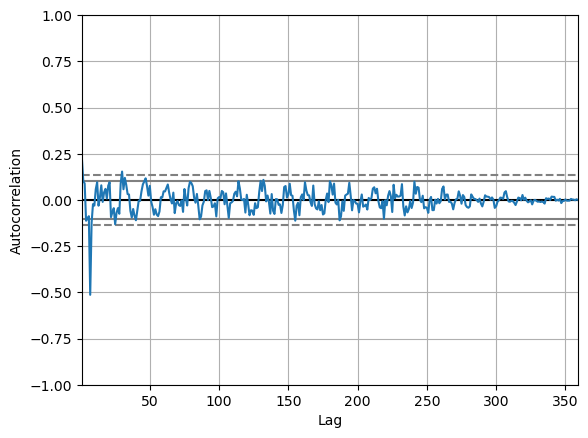

In [ ]:
autocorrelation_plot(train1s1['Crime_Count'])

### Determine parameters and Fit Model

In [ ]:
#SELECT PARAMETERS using All Subset Selection (AIC)
from itertools import product


def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in parameters_list:
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(dis=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True)
    return result_df




p = range(0, 2, 1)
d = 0
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train1s1['Crime_Count'])
result_df


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
11  (1, 0, 1, 1)  3149.327086
15  (1, 1, 1, 1)  3150.952375
7   (0, 1, 1, 1)  3151.236689
3   (0, 0, 1, 1)  3168.966826
9   (1, 0, 0, 1)  3254.349550
13  (1, 1, 0, 1)  3255.247814
5   (0, 1, 0, 1)  3256.254698
1   (0, 0, 0, 1)  3270.712388
10  (1, 0, 1, 0)  3405.126506
6   (0, 1, 1, 0)  3406.080750
14  (1, 1, 1, 0)  3406.896009
2   (0, 0, 1, 0)  3418.565664
8   (1, 0, 0, 0)  3611.660627
12  (1, 1, 0, 0)  3612.194201
4   (0, 1, 0, 0)  3613.518621
0   (0, 0, 0, 0)  3627.577241

In [ ]:
mod1 = SARIMAX(train1s1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train1s1['Crime_Count'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod1.aic}')
print(mod1.summary())


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

My Model AIC: 3255.247814148482 and the Optimized Model AIC: 3149.327086186152
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     17:06:06   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444      

### Model Diagnostics

Figure(1000x1000)


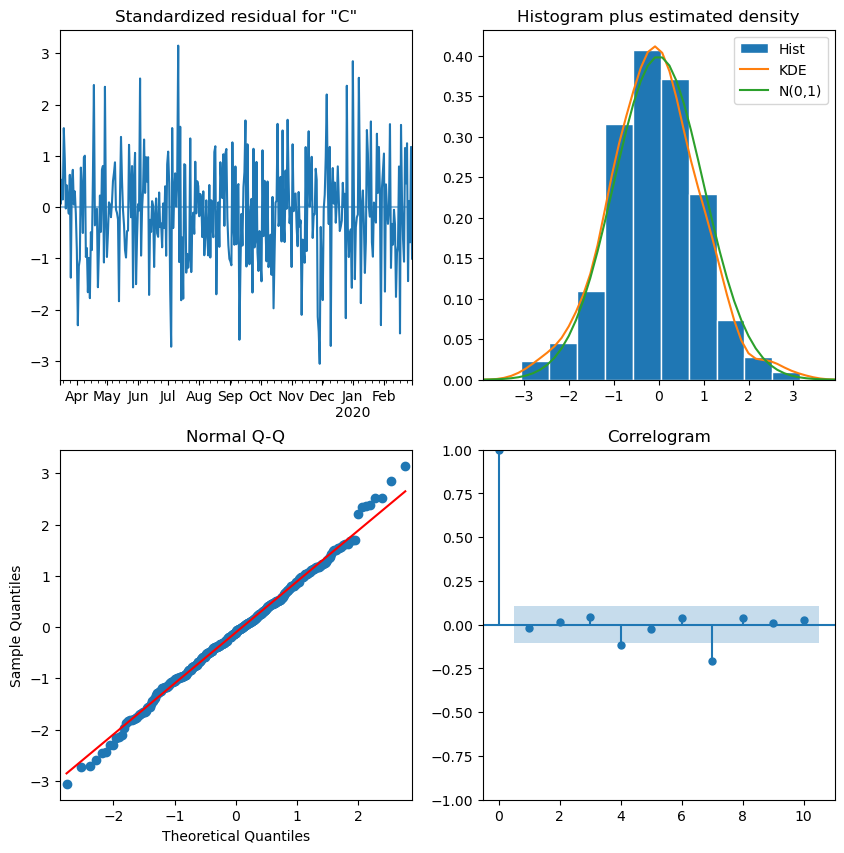

In [ ]:
#Model DIAGNOSTICS AND SUMMARY
print(mod1.plot_diagnostics(figsize=(10, 10)))

### Calculate MAE RMSE MAPE MASE

In [ ]:
#MEASURE PERFORMACE METRICS

fcast_len = len(test1)
fcast = mod1.forecast(fcast_len)

mse1 = mean_squared_error(test1['Crime_Count'], fcast)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(test1['Crime_Count'], fcast)
mape1= mean_absolute_percentage_error(test1['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse1}')
print(f'Root Mean Squared Error: {rmse1}')
print(f'Mean Absolute Error: {mae1}')
print(f'Mean Absolute Percentage Error: {mape1}')



Mean Squared Error: 12206.682766676047
Root Mean Squared Error: 110.48385749364496
Mean Absolute Error: 108.03165379190258
Mean Absolute Percentage Error: 0.9986334339616646


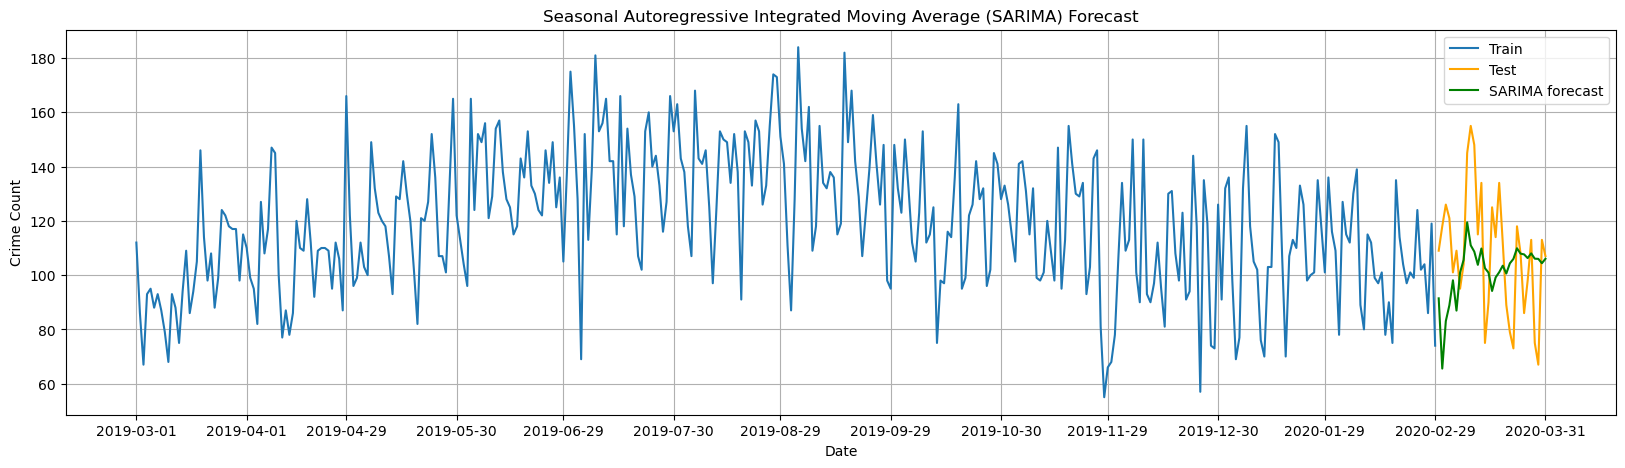

In [ ]:
# Ensure the index is a DateTime index for proper alignment

y_hat_sarima = test1.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train1['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train1['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test1['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()




## Repeat For Step 2: Set 2 March 2021 Test

Text(0, 0.5, '\nNumber of Reported Crimes\n')

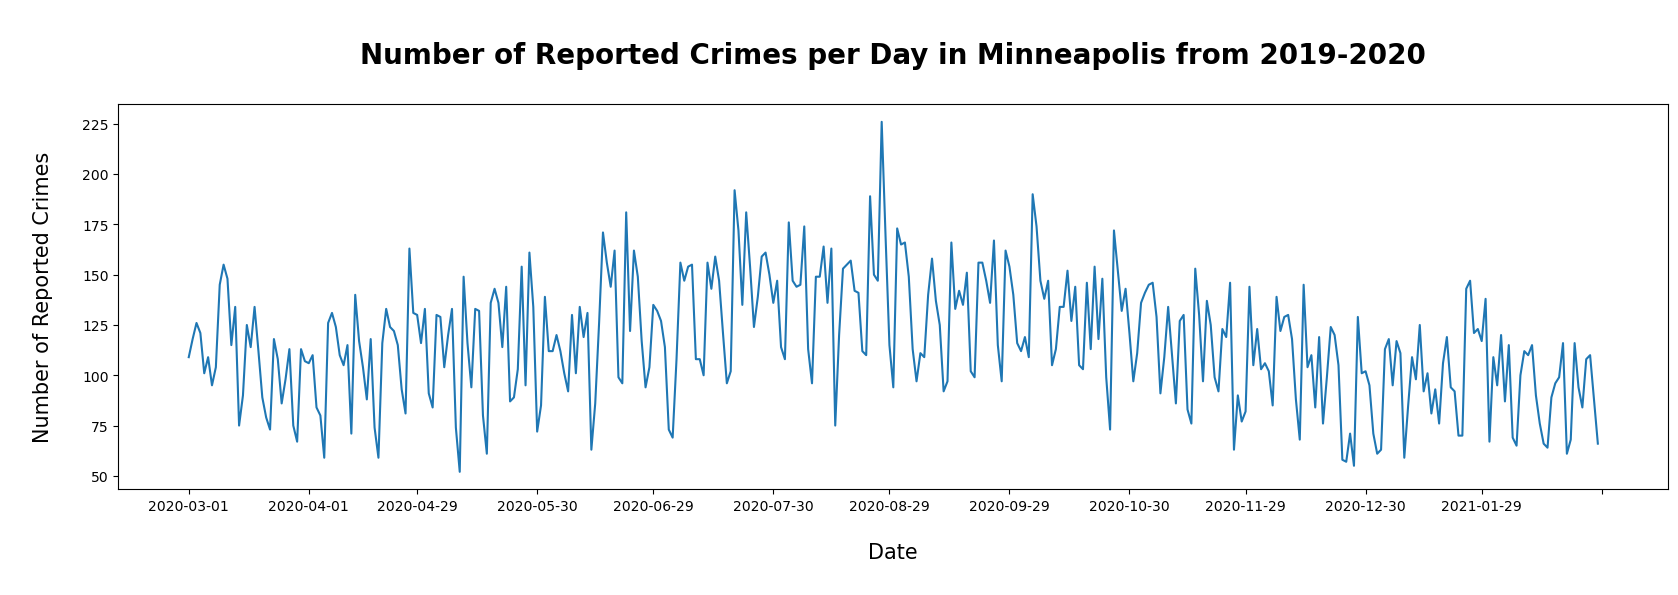

In [ ]:
# PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train2.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})


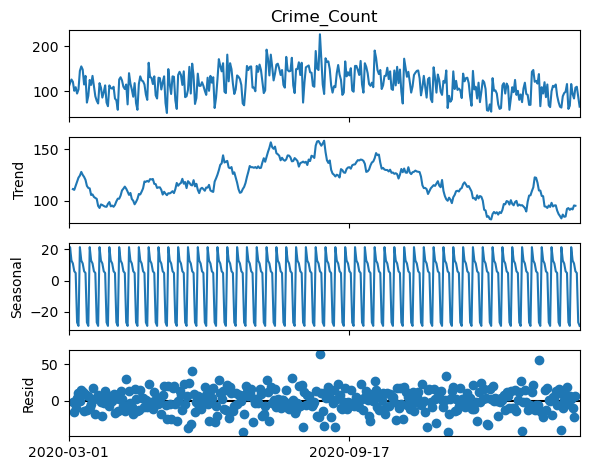

In [ ]:
#CHECK STATIONARITY and SEASONALITY
decomposition=seasonal_decompose(train2['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train2), 200))
plt.show()


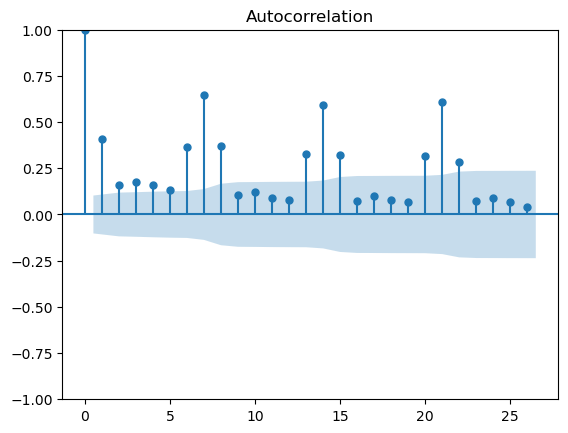

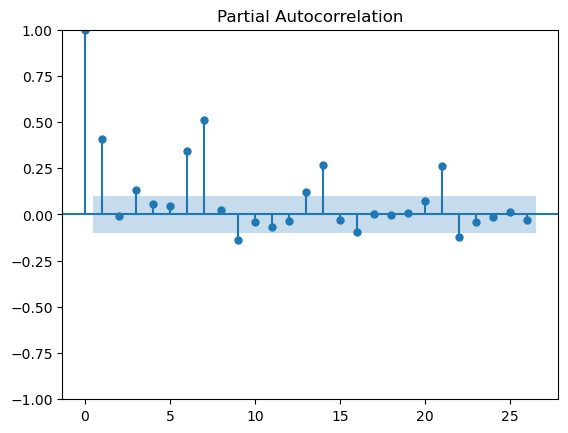

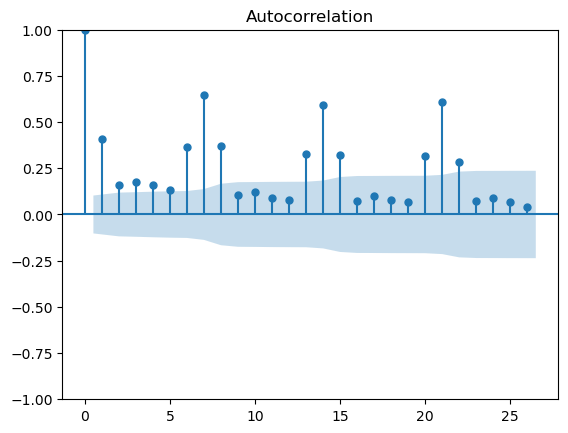

In [ ]:
plot_pacf(train2.Crime_Count)
plot_acf(train2.Crime_Count)

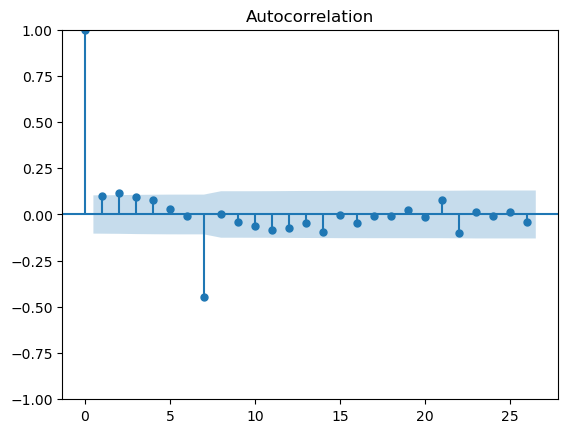

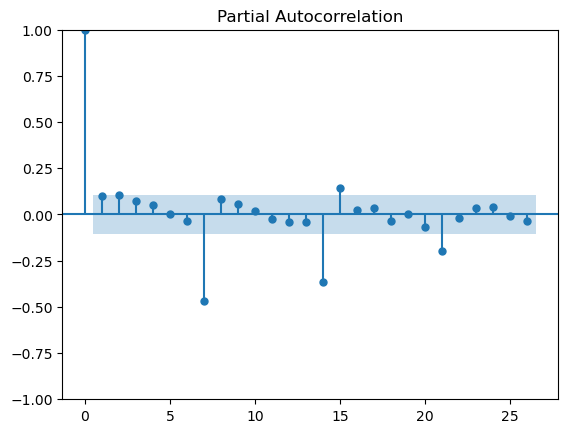

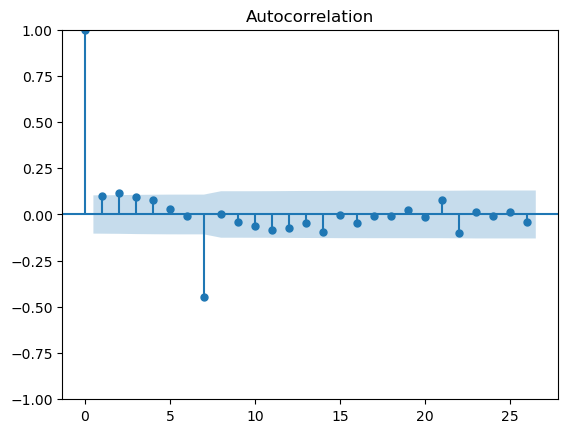

In [ ]:
#DIFFERENCE
train2s1= train2.copy()
train2s1['Crime_Count']=train2['Crime_Count'] - train2['Crime_Count'].shift(7)
train2s1=train2s1.dropna()

plot_pacf(train2s1.Crime_Count)
plot_acf(train2s1.Crime_Count)

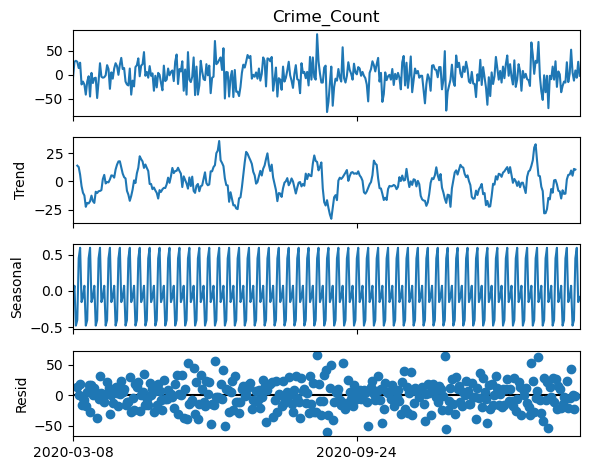

In [ ]:
decomposition=seasonal_decompose(train2s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train2s1), 200))
plt.show()

In [ ]:
p = range(0, 3, 1)
d = 0
q = range(0, 3, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train2s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
23  (1, 2, 1, 1)  3205.536086
31  (2, 1, 1, 1)  3206.040200
19  (1, 1, 1, 1)  3206.192580
27  (2, 0, 1, 1)  3208.924416
11  (0, 2, 1, 1)  3212.566166
15  (1, 0, 1, 1)  3214.946078
7   (0, 1, 1, 1)  3216.668713
3   (0, 0, 1, 1)  3220.549365
35  (2, 2, 1, 1)  3222.471641
33  (2, 2, 0, 1)  3249.996429
25  (2, 0, 0, 1)  3288.405729
29  (2, 1, 0, 1)  3289.099565
9   (0, 2, 0, 1)  3289.700517
13  (1, 0, 0, 1)  3290.529689
5   (0, 1, 0, 1)  3291.162490
1   (0, 0, 0, 1)  3292.153184
21  (1, 2, 0, 1)  3293.620081
17  (1, 1, 0, 1)  3295.258333
34  (2, 2, 1, 0)  3397.904808
22  (1, 2, 1, 0)  3457.962079
26  (2, 0, 1, 0)  3459.110768
10  (0, 2, 1, 0)  3461.078668
30  (2, 1, 1, 0)  3462.747218
14  (1, 0, 1, 0)  3463.373325
6   (0, 1, 1, 0)  3464.160909
2   (0, 0, 1, 0)  3465.189621
18  (1, 1, 1, 0)  3468.837496
32  (2, 2, 0, 0)  3549.292603
16  (1, 1, 0, 0)  3614.668380
24  (2, 0, 0, 0)  3630.876995
0   (0, 0, 0, 0)  3630.975781
12  (1, 0, 0, 0)  3631.240522
8   (0, 2, 0, 0)  3631.372265
4   (0, 1, 0, 0)  3631.481680
20  (1, 2, 0, 0)  3631.948781
28  (2, 1, 0, 0)  3632.172607

In [ ]:
mod2 = SARIMAX(train2s1['Crime_Count'], order=(1,0,2), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train2s1['Crime_Count'], order=(2, 0, 2), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod2.aic}')
print(mod1.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

My Model AIC: 3249.996429393723 and the Optimized Model AIC: 3205.5360862027974
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     18:55:30   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444     

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Figure(1000x1000)


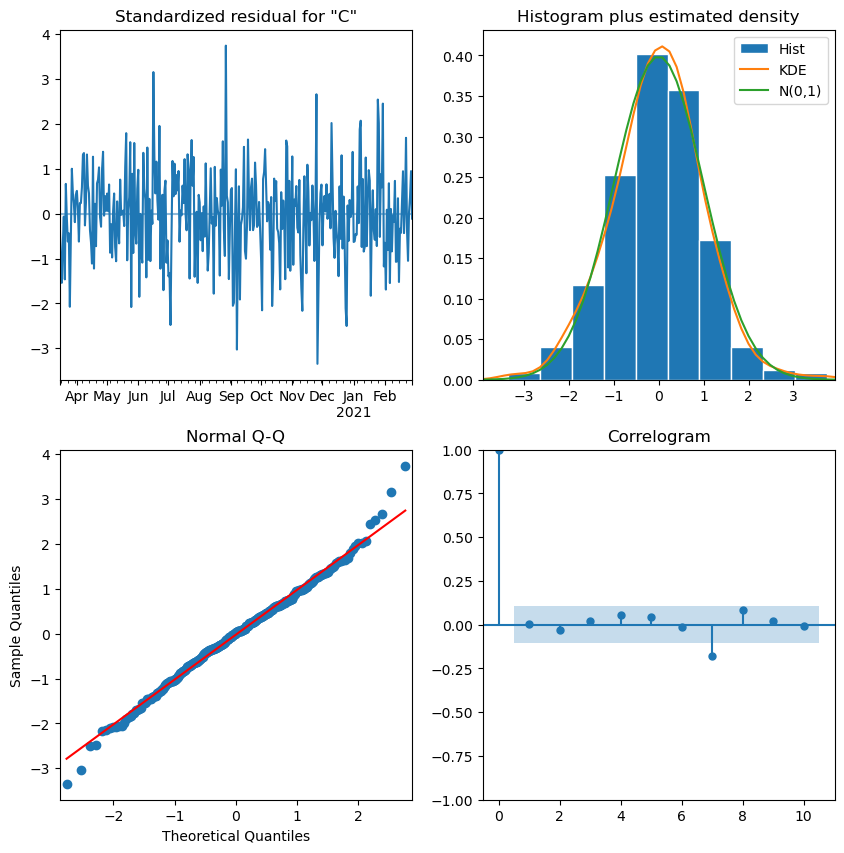

In [ ]:
print(mod2.plot_diagnostics(figsize=(10, 10)))

In [ ]:
#FIT MODEL AND CALCULATE MSE

fcast_len = len(test2)
fcast = mod2.forecast(fcast_len)

mse2 = mean_squared_error(test2['Crime_Count'], fcast)
rmse2 = np.sqrt(mse2)
mae2 = mean_absolute_error(test2['Crime_Count'], fcast)
mape2= mean_absolute_percentage_error(test2['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse2}')
print(f'Root Mean Squared Error: {rmse2}')
print(f'Mean Absolute Error: {mae2}')
print(f'Mean Absolute Percentage Error: {mape2}')

Mean Squared Error: 8621.473891693471
Root Mean Squared Error: 92.85189223539535
Mean Absolute Error: 91.12105882553563
Mean Absolute Percentage Error: 1.013791019497238


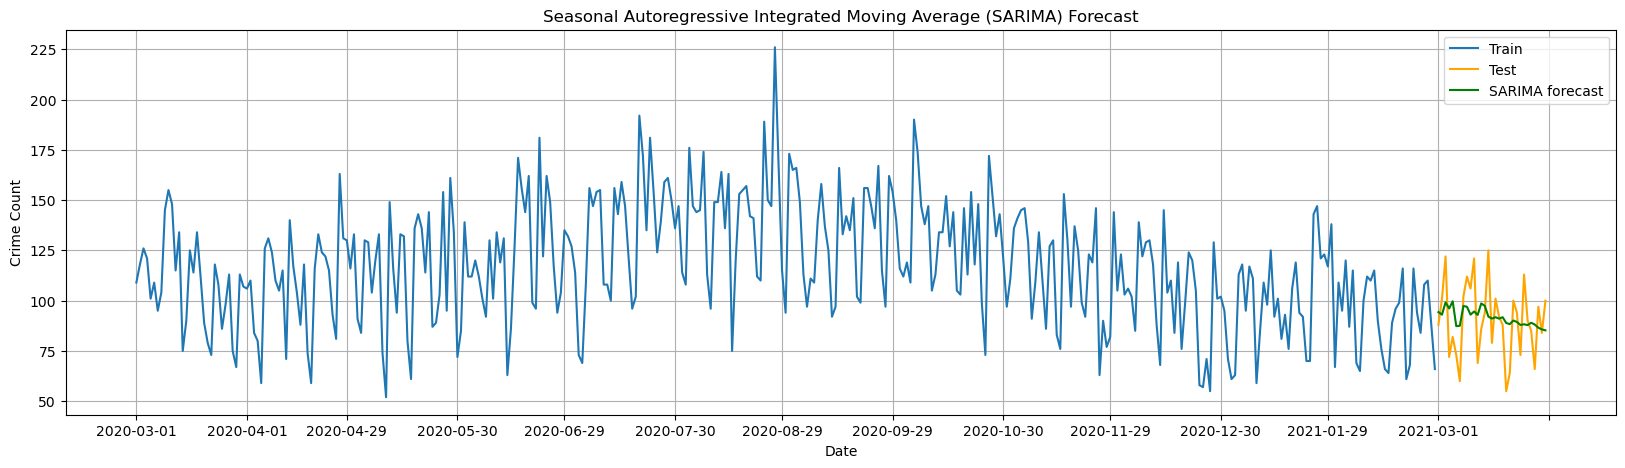

In [ ]:
y_hat_sarima = test2.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train2['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train2['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test2['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()


## Repeat For Step 3: Set 3 2019-2022

Text(0, 0.5, '\nNumber of Reported Crimes\n')

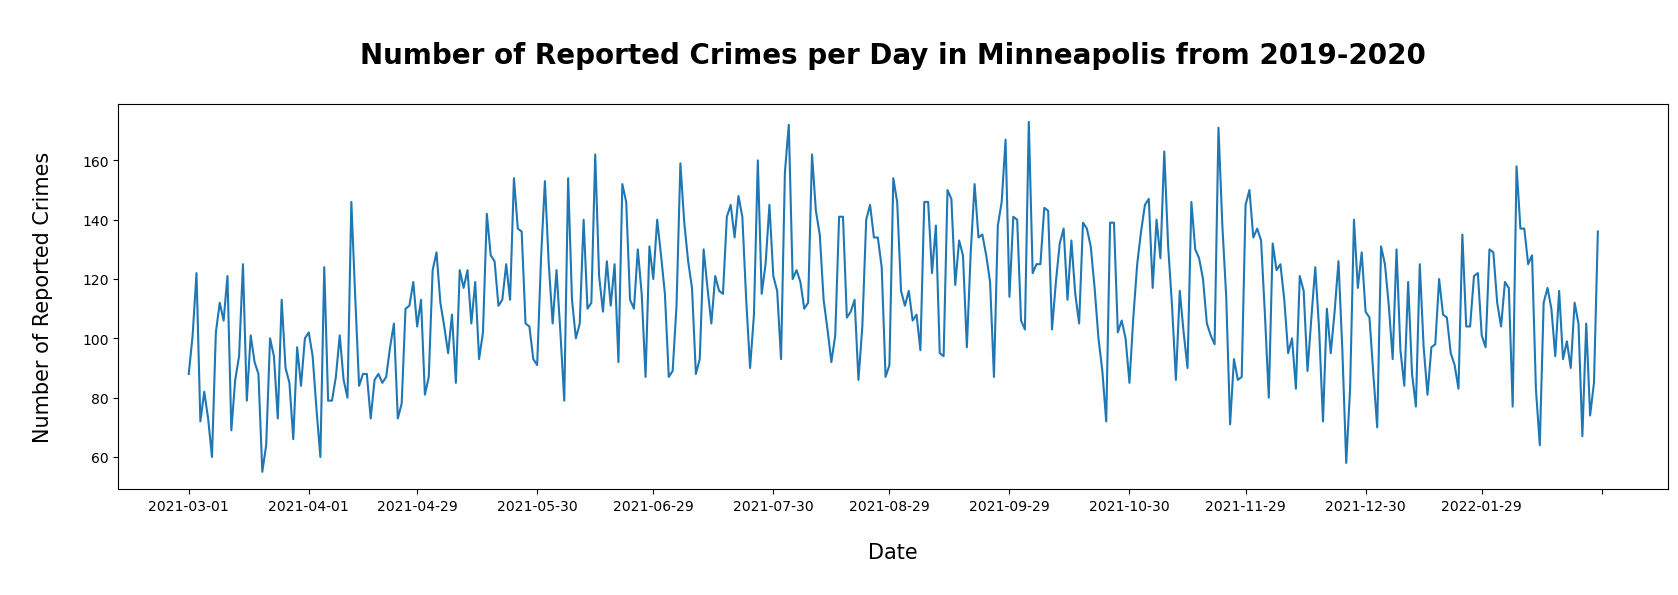

In [ ]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train3.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



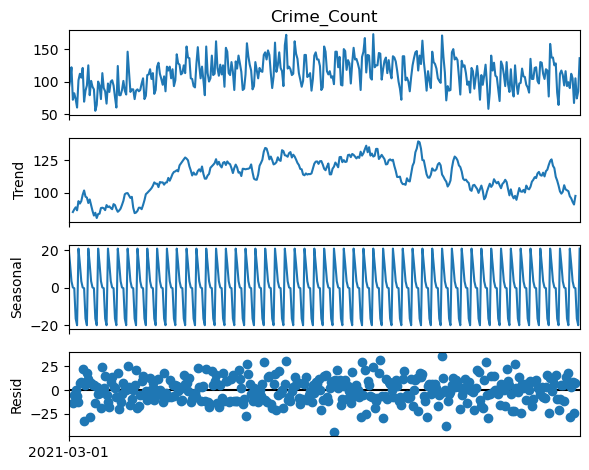

In [ ]:
#CHECK STATIONARITY
decomposition=seasonal_decompose(train3['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train3), 500))
plt.show()

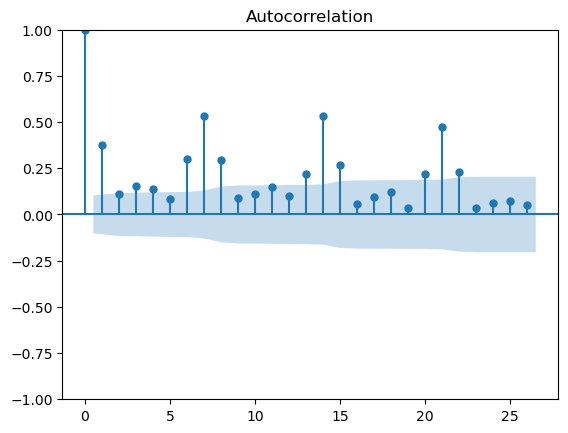

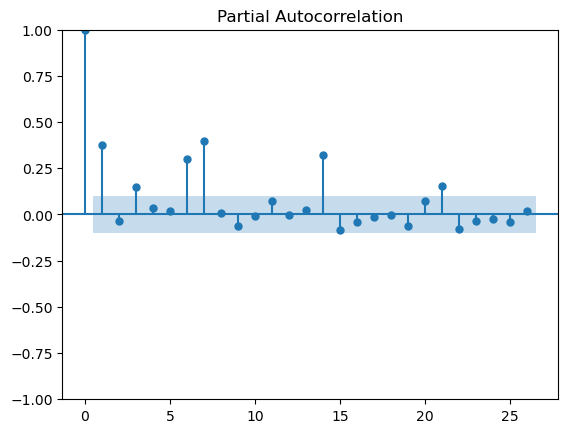

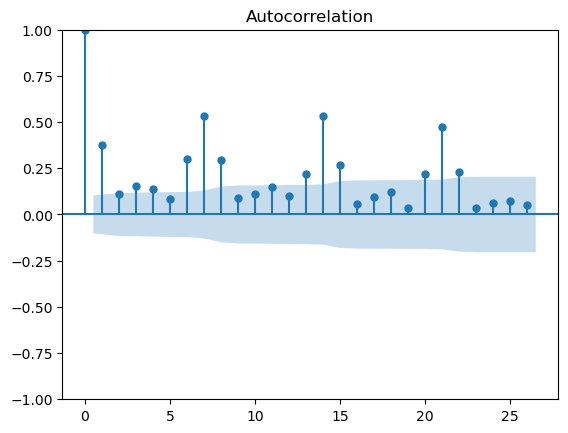

In [ ]:
plot_pacf(train3.Crime_Count)
plot_acf(train3.Crime_Count)

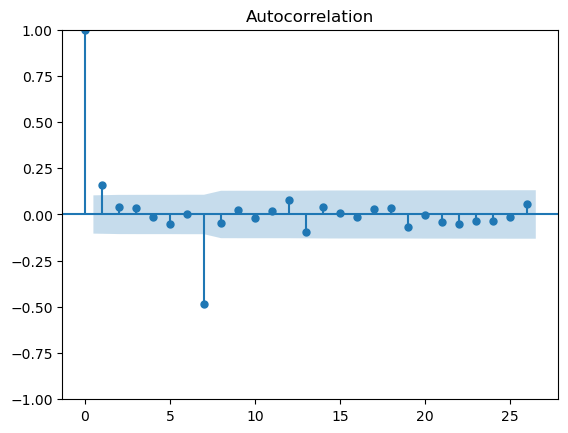

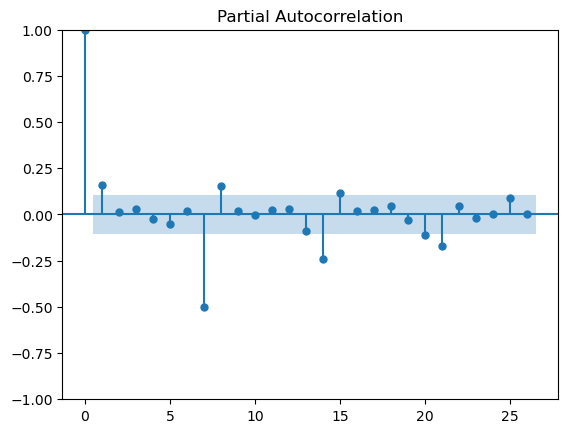

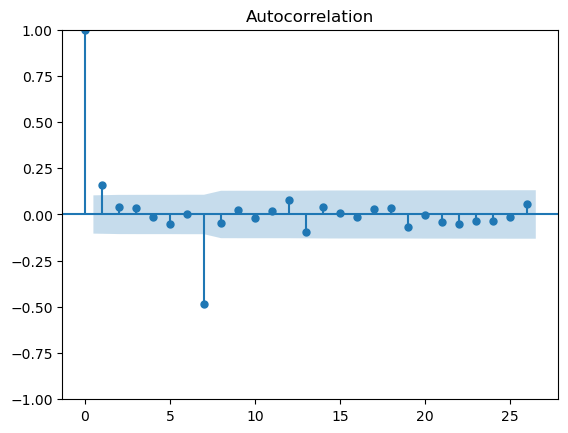

In [ ]:
#DIFFERENCE
train3s1= train3.copy()
train3s1['Crime_Count']=train3['Crime_Count'] - train3['Crime_Count'].shift(7)
train3s1=train3s1.dropna()

plot_pacf(train3s1.Crime_Count)
plot_acf(train3s1.Crime_Count)

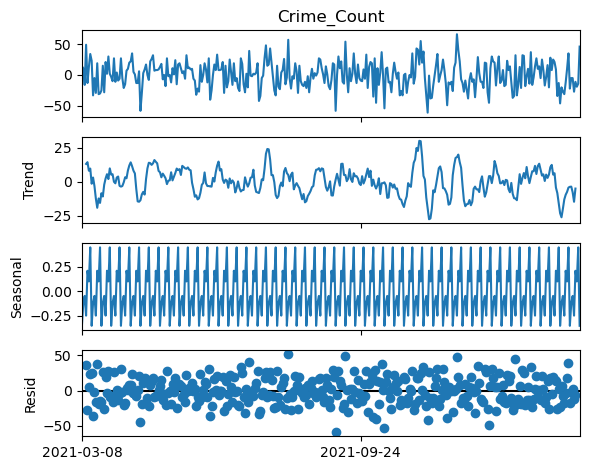

In [ ]:
decomposition=seasonal_decompose(train3s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train3s1), 200))
plt.show()

In [ ]:
p = range(0, 2, 1)
d = 0
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train3s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
11  (1, 0, 1, 1)  3087.721108
7   (0, 1, 1, 1)  3088.109478
15  (1, 1, 1, 1)  3089.654530
3   (0, 0, 1, 1)  3105.359060
9   (1, 0, 0, 1)  3188.959061
5   (0, 1, 0, 1)  3189.335050
13  (1, 1, 0, 1)  3190.853574
1   (0, 0, 0, 1)  3195.804145
6   (0, 1, 1, 0)  3318.503439
10  (1, 0, 1, 0)  3319.083926
14  (1, 1, 1, 0)  3320.496721
2   (0, 0, 1, 0)  3330.069939
8   (1, 0, 0, 0)  3539.666338
4   (0, 1, 0, 0)  3539.937448
12  (1, 1, 0, 0)  3541.452745
0   (0, 0, 0, 0)  3543.001195

In [ ]:
mod3 = SARIMAX(train3s1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train3s1['Crime_Count'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod3.aic}')
print(mod1.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


My Model AIC: 3190.853573692846 and the Optimized Model AIC: 3087.7211077731395
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1570.664
Date:                             Tue, 01 Apr 2025   AIC                           3149.327
Time:                                     18:57:03   BIC                           3164.782
Sample:                                 03-08-2019   HQIC                          3155.477
                                      - 02-29-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2444     

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments p

Figure(1000x1000)


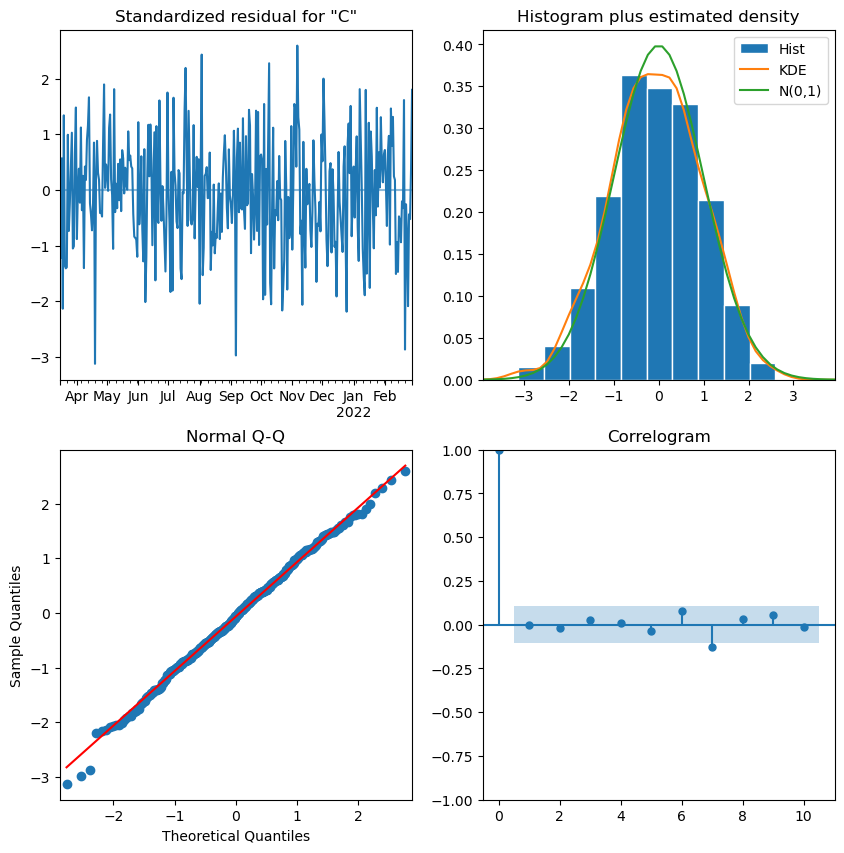

In [ ]:
print(mod3.plot_diagnostics(figsize=(10, 10)))

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test3)
fcast = mod3.forecast(fcast_len)

mse3 = mean_squared_error(test3['Crime_Count'], fcast)
rmse3 = np.sqrt(mse3)
mae3 = mean_absolute_error(test3['Crime_Count'], fcast)
mape3= mean_absolute_percentage_error(test3['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse3}')
print(f'Root Mean Squared Error: {rmse3}')
print(f'Mean Absolute Error: {mae3}')
print(f'Mean Absolute Percentage Error: {mape3}')

Mean Squared Error: 12042.775234324292
Root Mean Squared Error: 109.73957916050294
Mean Absolute Error: 107.71137739726697
Mean Absolute Percentage Error: 0.9923181517791968


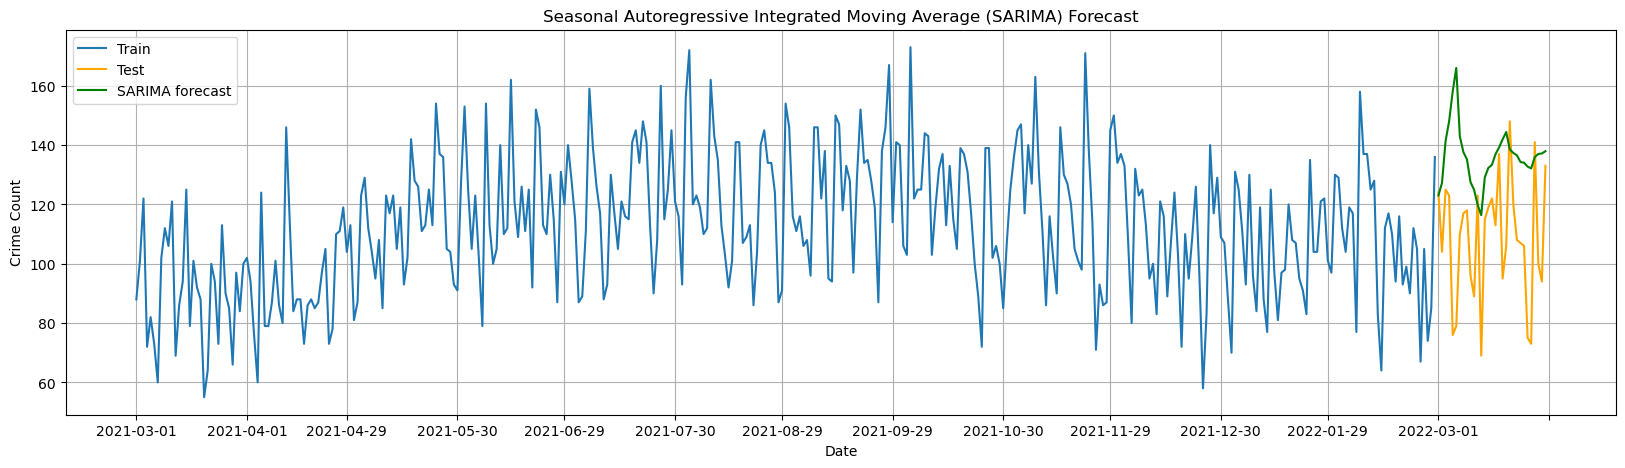

In [ ]:
y_hat_sarima = test3.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train3['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train3['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test3['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## Repeat for Step 4: Set 4 2019-2023

Text(0, 0.5, '\nNumber of Reported Crimes\n')

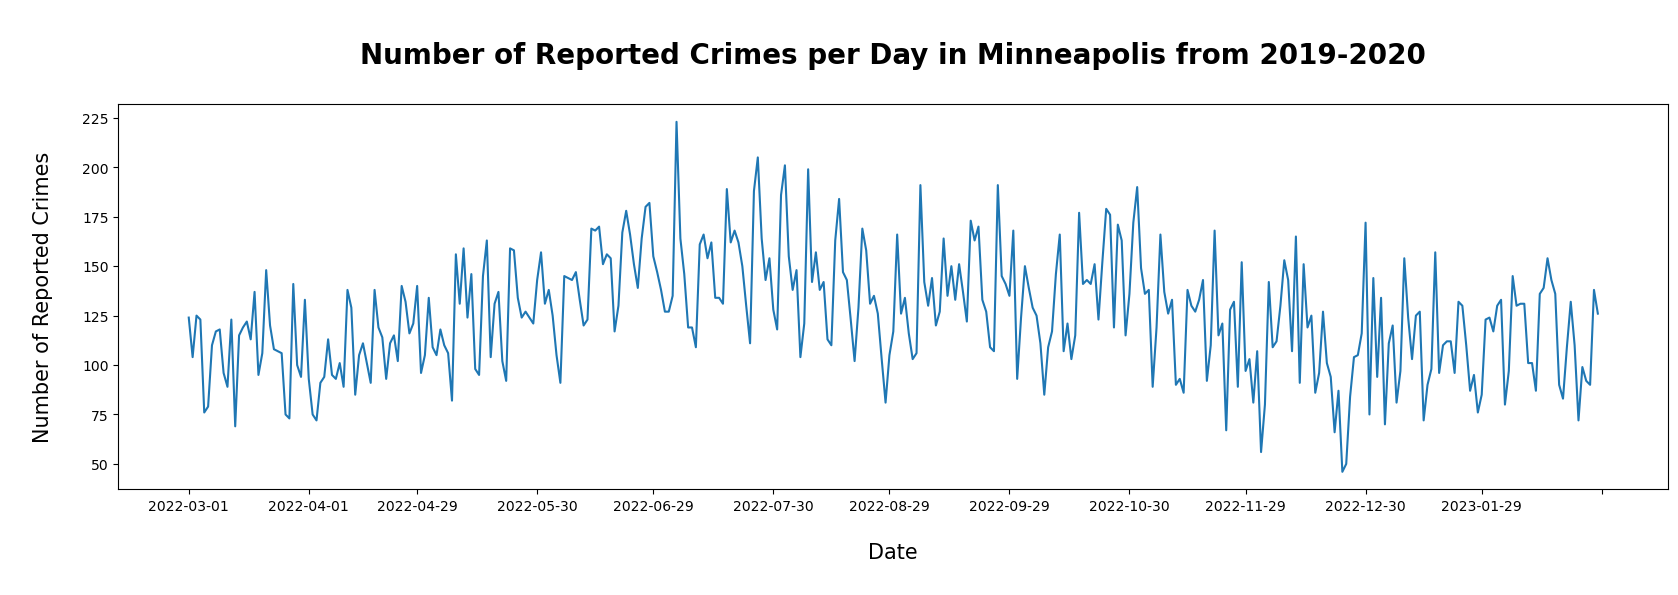

In [ ]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train4.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



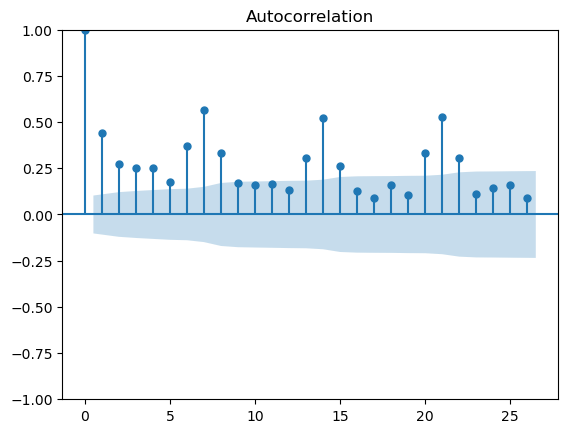

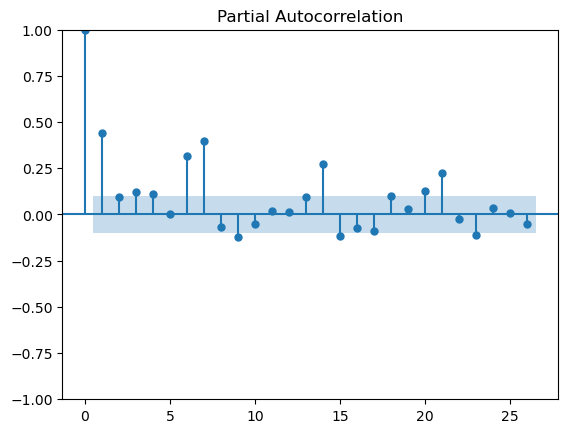

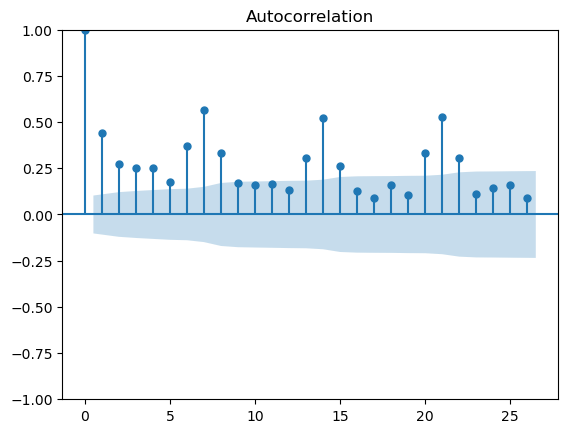

In [ ]:
plot_pacf(train4.Crime_Count)
plot_acf(train4.Crime_Count)

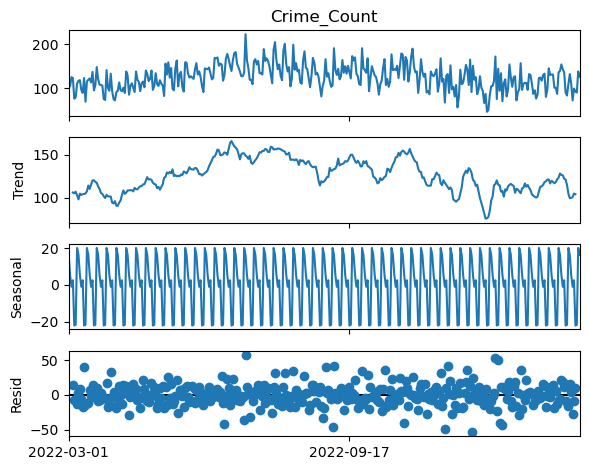

In [ ]:
decomposition=seasonal_decompose(train4['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train4), 200))
plt.show()

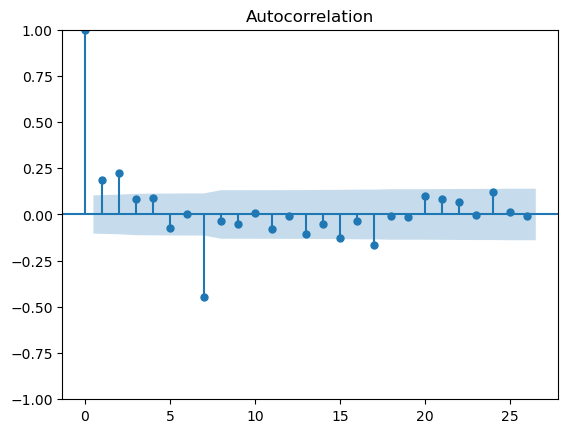

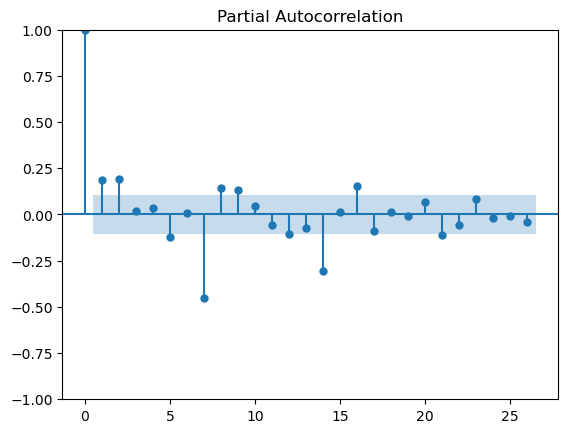

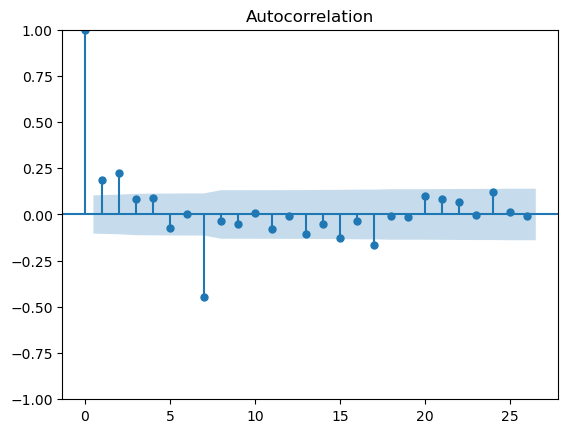

In [ ]:
train4s1= train4.copy()
train4s1['Crime_Count']=train4['Crime_Count'] - train4['Crime_Count'].shift(7)
train4s1=train4s1.dropna()

plot_pacf(train4s1.Crime_Count)
plot_acf(train4s1.Crime_Count)

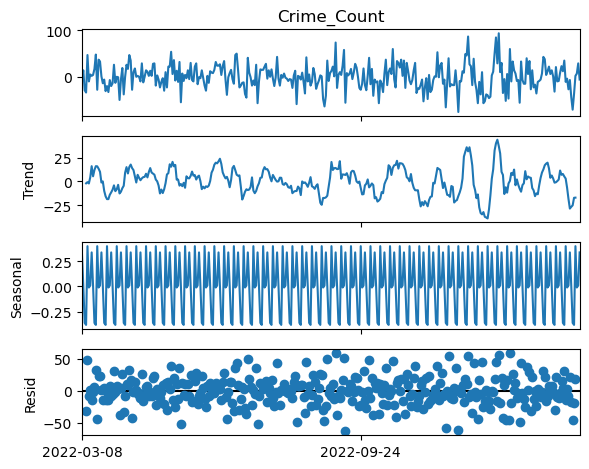

In [ ]:
decomposition=seasonal_decompose(train4s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train4s1), 200))
plt.show()

In [ ]:
p = range(0, 3, 1)
d = 0
q = range(0, 3, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train4s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
23  (1, 2, 1, 1)  3231.475037
31  (2, 1, 1, 1)  3232.281696
19  (1, 1, 1, 1)  3233.299557
27  (2, 0, 1, 1)  3233.340232
35  (2, 2, 1, 1)  3234.569851
11  (0, 2, 1, 1)  3243.428097
15  (1, 0, 1, 1)  3247.820858
7   (0, 1, 1, 1)  3255.777357
3   (0, 0, 1, 1)  3271.436873
33  (2, 2, 0, 1)  3312.926702
25  (2, 0, 0, 1)  3322.531128
29  (2, 1, 0, 1)  3324.383923
9   (0, 2, 0, 1)  3325.790381
17  (1, 1, 0, 1)  3327.292887
13  (1, 0, 0, 1)  3334.015775
5   (0, 1, 0, 1)  3337.648797
21  (1, 2, 0, 1)  3340.784653
1   (0, 0, 0, 1)  3344.572380
22  (1, 2, 1, 0)  3475.100543
26  (2, 0, 1, 0)  3475.407797
34  (2, 2, 1, 0)  3475.989790
30  (2, 1, 1, 0)  3476.037741
18  (1, 1, 1, 0)  3476.214852
10  (0, 2, 1, 0)  3481.965221
14  (1, 0, 1, 0)  3483.931710
6   (0, 1, 1, 0)  3490.328249
2   (0, 0, 1, 0)  3505.758449
28  (2, 1, 0, 0)  3645.474755
32  (2, 2, 0, 0)  3647.158155
24  (2, 0, 0, 0)  3666.401805
8   (0, 2, 0, 0)  3667.133908
20  (1, 2, 0, 0)  3669.133886
16  (1, 1, 0, 0)  3672.794861
12  (1, 0, 0, 0)  3676.169732
4   (0, 1, 0, 0)  3678.010793
0   (0, 0, 0, 0)  3680.852400

In [ ]:
mod4 = SARIMAX(train4s1['Crime_Count'], order=(1,0,2), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train4s1['Crime_Count'], order=(2, 0, 2), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod4.aic}')
print(mod4.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

My Model AIC: 3312.9267022825616 and the Optimized Model AIC: 3231.4750373404377
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  358
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 7)   Log Likelihood               -1609.738
Date:                             Tue, 01 Apr 2025   AIC                           3231.475
Time:                                     18:58:22   BIC                           3254.640
Sample:                                 03-08-2022   HQIC                          3240.694
                                      - 02-28-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6785    

Figure(1000x1000)


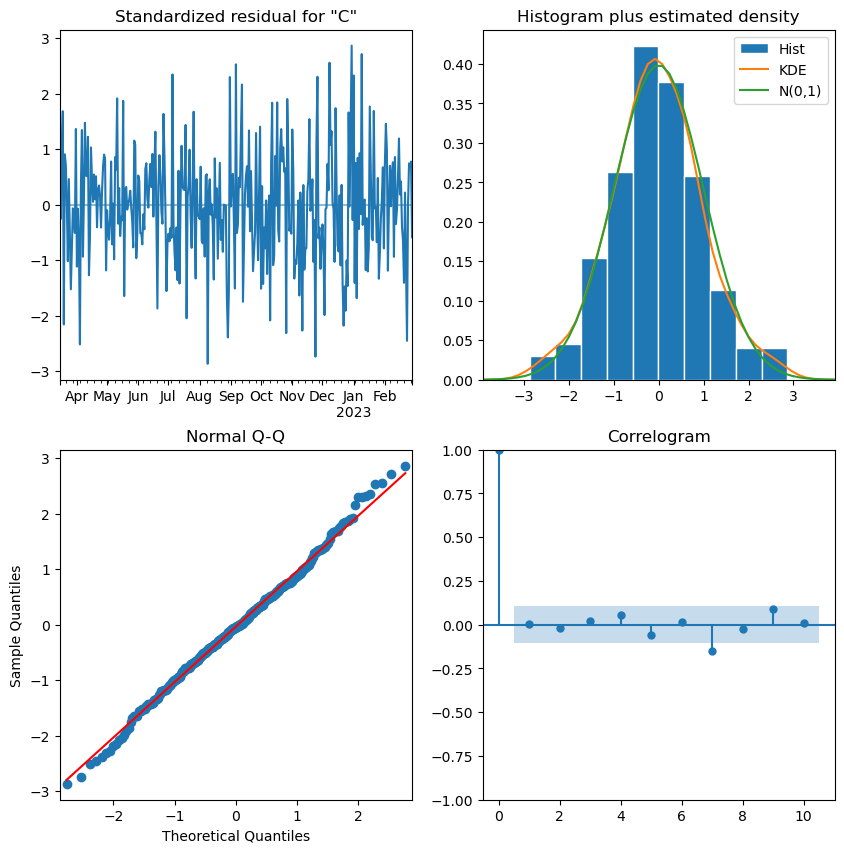

In [ ]:
print(mod4.plot_diagnostics(figsize=(10, 10)))

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test4)
fcast = mod4.forecast(fcast_len)

mse4 = mean_squared_error(test4['Crime_Count'], fcast)
rmse4 = np.sqrt(mse4)
mae4 = mean_absolute_error(test4['Crime_Count'], fcast)
mape4= mean_absolute_percentage_error(test4['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse4}')
print(f'Root Mean Squared Error: {rmse4}')
print(f'Mean Absolute Error: {mae4}')
print(f'Mean Absolute Percentage Error: {mape4}')

Mean Squared Error: 15341.245377865751
Root Mean Squared Error: 123.85978111504053
Mean Absolute Error: 122.06569351036833
Mean Absolute Percentage Error: 0.9914152426850664


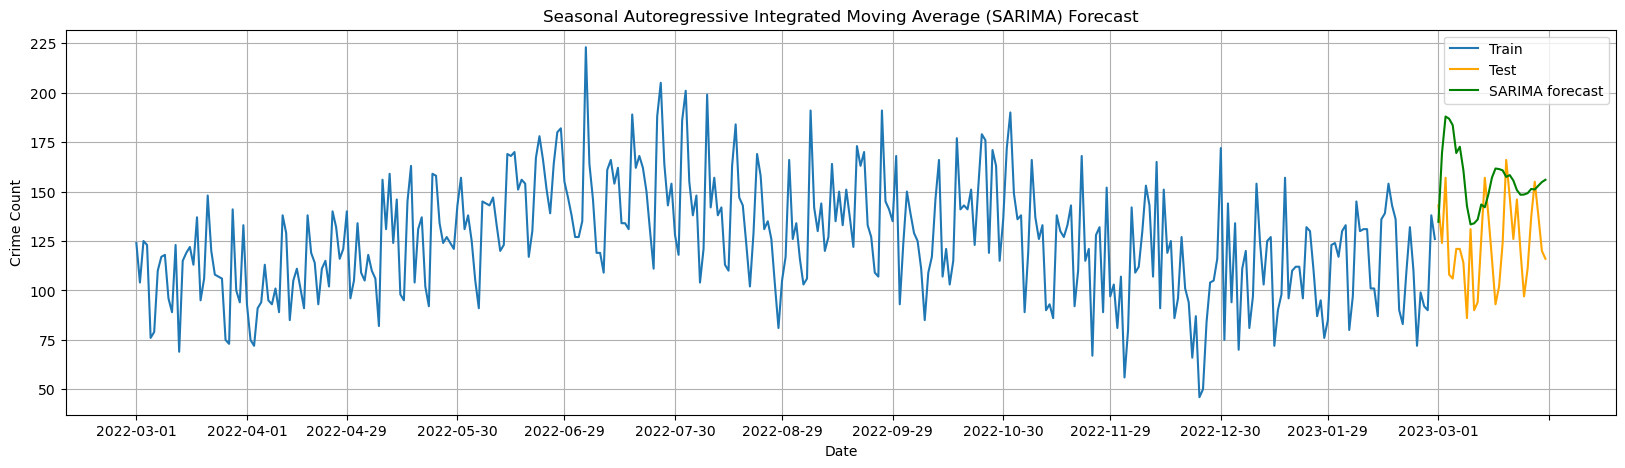

In [ ]:
y_hat_sarima = test4.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train4['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train4['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test4['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## Repeat for Step 5: Set 5

Text(0, 0.5, '\nNumber of Reported Crimes\n')

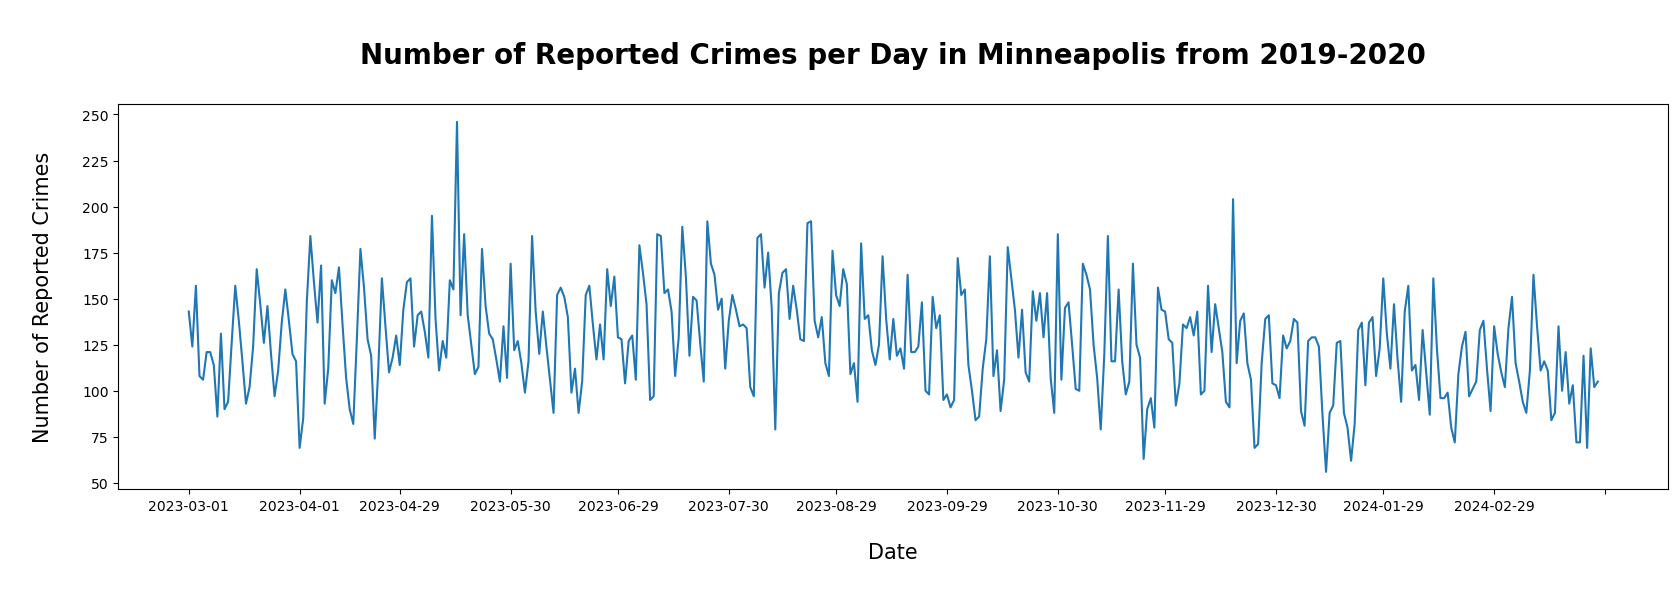

In [ ]:
# #PLOT
ax.clear()
fig, ax=plt.subplots(figsize=(20, 5))
plt.plot(train5.Crime_Count); 
# plt.xticks(rotation=10, fontsize=15)

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

ax.set_title("\nNumber of Reported Crimes per Day in Minneapolis from 2019-2020\n",weight='bold',fontdict={'fontsize':20})
ax.set_xlabel("\nDate\n",fontdict={'fontsize':15})
ax.set_ylabel("\nNumber of Reported Crimes\n",fontdict={'fontsize':15})



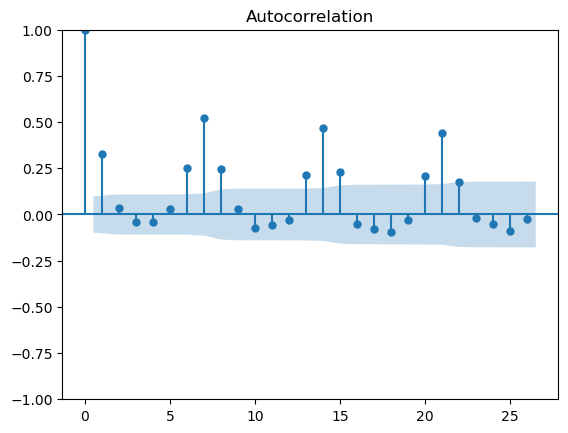

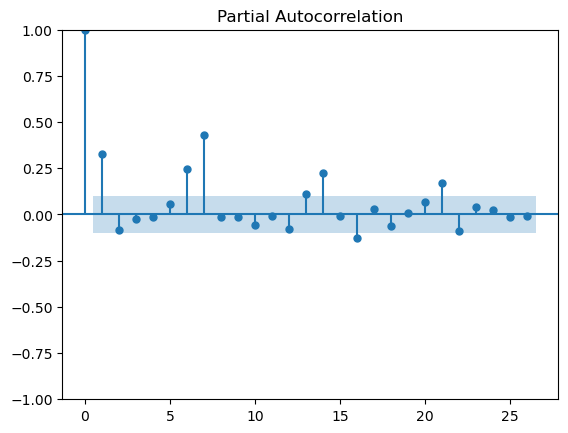

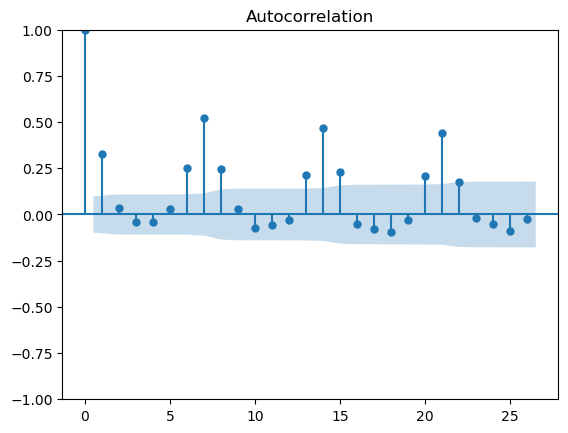

In [ ]:
plot_pacf(train5.Crime_Count)
plot_acf(train5.Crime_Count)

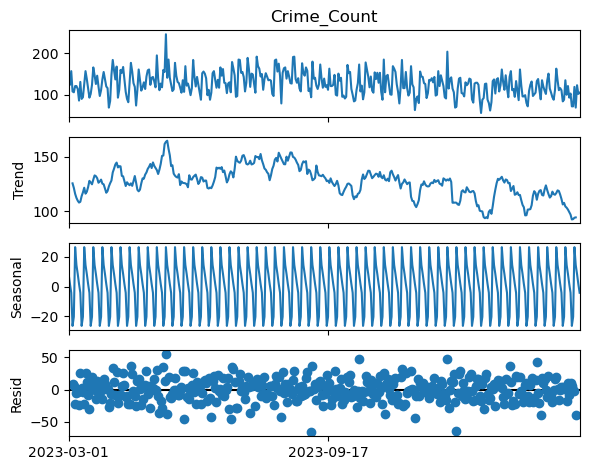

In [ ]:
decomposition=seasonal_decompose(train5['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train5), 200))
plt.show()

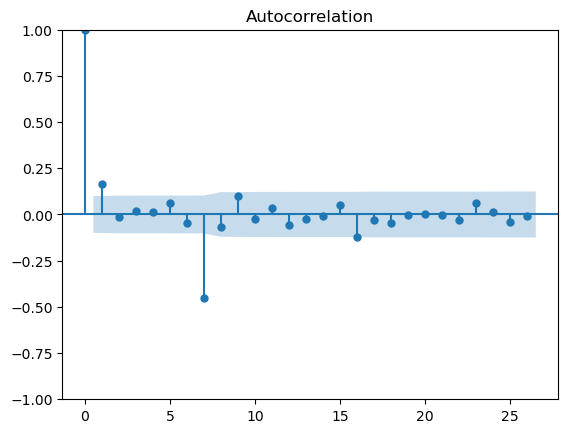

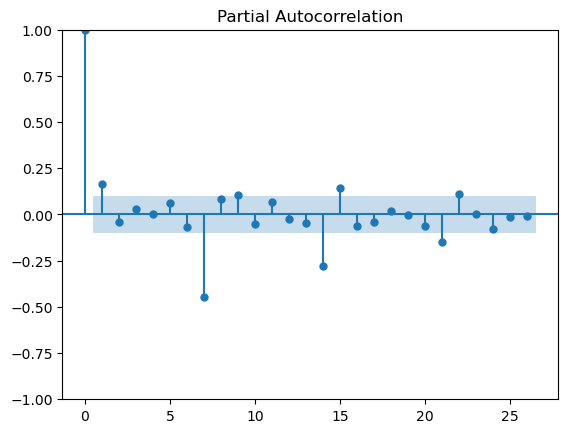

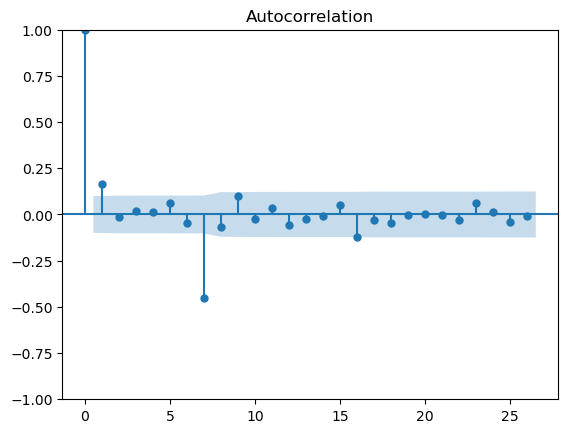

In [ ]:
train5s1= train5.copy()
train5s1['Crime_Count']=train5['Crime_Count'] - train5['Crime_Count'].shift(7)
train5s1=train5s1.dropna()

plot_pacf(train5s1.Crime_Count)
plot_acf(train5s1.Crime_Count)

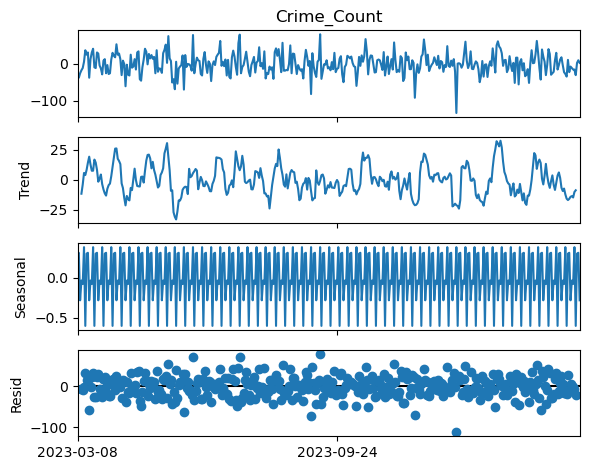

In [ ]:
decomposition=seasonal_decompose(train5s1['Crime_Count'],model='additive',period=7)
decomposition.plot()
plt.xticks(ticks=range(0, len(train5s1), 200))
plt.show()

In [ ]:
p = range(0, 2, 1)
d = 0
q = range(0, 2, 1)
P = range(0, 2, 1)
D = 1
Q = range(0, 2, 1)
s = 7

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

result_df = optimize_SARIMA(parameters_list, d, D, s, train5s1['Crime_Count'])
result_df

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

(p,q)x(P,Q)          AIC
11  (1, 0, 1, 1)  3557.520865
7   (0, 1, 1, 1)  3558.709564
15  (1, 1, 1, 1)  3558.857452
3   (0, 0, 1, 1)  3568.071609
5   (0, 1, 0, 1)  3639.258247
9   (1, 0, 0, 1)  3639.960728
13  (1, 1, 0, 1)  3641.052403
1   (0, 0, 0, 1)  3648.245763
14  (1, 1, 1, 0)  3804.022661
10  (1, 0, 1, 0)  3807.523744
6   (0, 1, 1, 0)  3807.931851
2   (0, 0, 1, 0)  3813.521532
12  (1, 1, 0, 0)  4013.063975
4   (0, 1, 0, 0)  4013.257240
8   (1, 0, 0, 0)  4015.044157
0   (0, 0, 0, 0)  4021.306256

In [ ]:
mod5 = SARIMAX(train5s1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
my_model=SARIMAX(train5s1['Crime_Count'], order=(1, 0, 1), seasonal_order=(0, 1, 1, 7)).fit(dis=-1)
print(f'My Model AIC: {my_model.aic} and the Optimized Model AIC: {mod5.aic}')
print(mod5.summary())

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

My Model AIC: 3641.052403352681 and the Optimized Model AIC: 3557.5208650547715
                                      SARIMAX Results                                      
Dep. Variable:                         Crime_Count   No. Observations:                  388
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 7)   Log Likelihood               -1774.760
Date:                             Tue, 01 Apr 2025   AIC                           3557.521
Time:                                     18:59:29   BIC                           3573.292
Sample:                                 03-08-2023   HQIC                          3563.778
                                      - 03-29-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1798     

Figure(1000x1000)


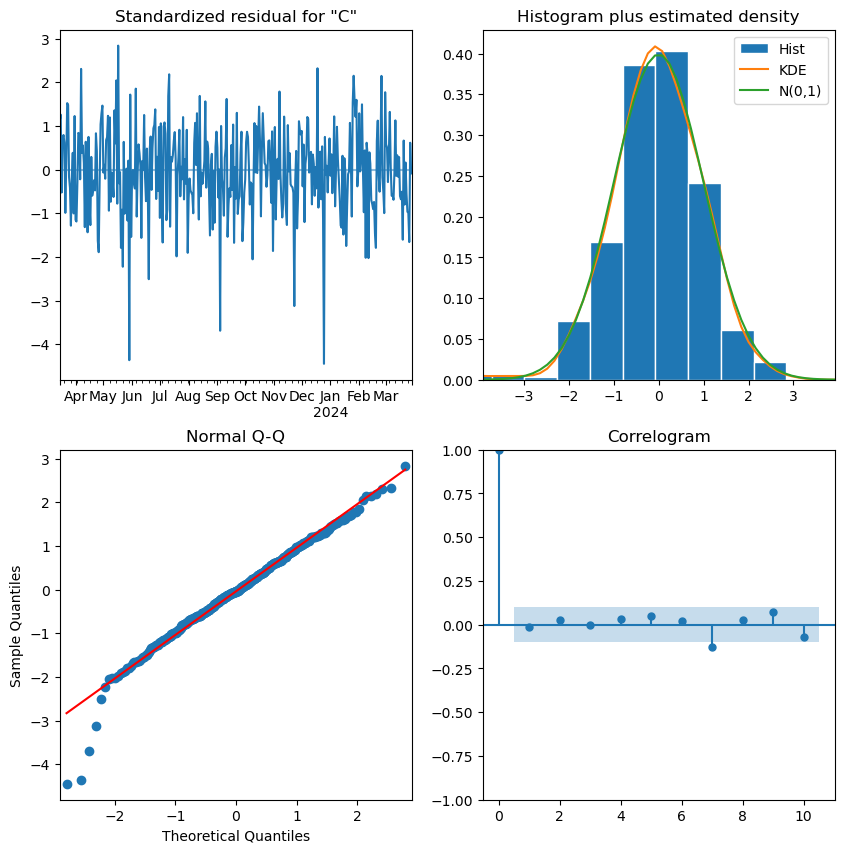

In [ ]:
print(mod5.plot_diagnostics(figsize=(10, 10)))

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast_len = len(test5)
fcast = mod5.forecast(fcast_len)

mse5 = mean_squared_error(test5['Crime_Count'], fcast)
rmse5 = np.sqrt(mse5)
mae5 = mean_absolute_error(test5['Crime_Count'], fcast)
mape5= mean_absolute_percentage_error(test5['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse5}')
print(f'Root Mean Squared Error: {rmse5}')
print(f'Mean Absolute Error: {mae5}')
print(f'Mean Absolute Percentage Error: {mape5}')

Mean Squared Error: 11867.653364759819
Root Mean Squared Error: 108.93875969901539
Mean Absolute Error: 106.53856626948026
Mean Absolute Percentage Error: 0.9991666669135945


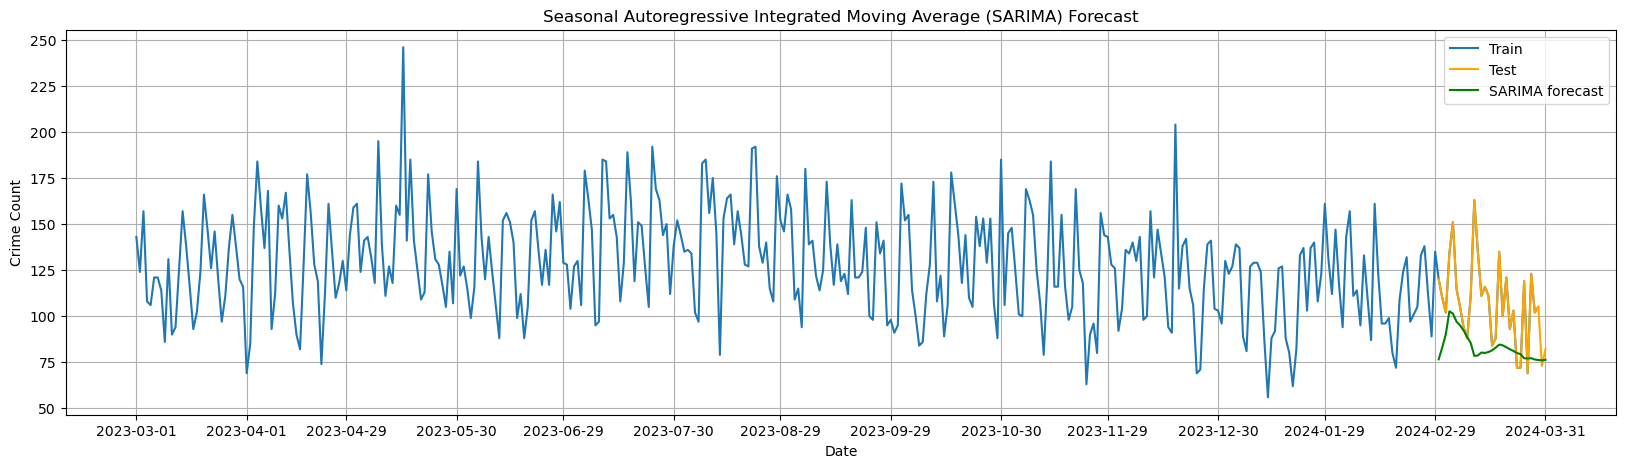

In [ ]:
y_hat_sarima = test5.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train5['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train5['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test5['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

## COMPARE SARIMA MODELS

In [573]:
#SARIMA Model
# initialize data of lists.
data = {'SARIMA Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5'],
        'Parameters':['(1,0,0)(1,1,1,7)','(1,0,2)(1,1,1,7)','(1,0,0)(1,1,1,7)','(1,0,2)(1,1,1,7)','(1,0,0)(1,1,1,7)'],
        'MSE': [mse1, mse2, mse3, mse4,mse5],
        'RMSE':[rmse1,rmse2,rmse3,rmse4,rmse5],
        'MAE':[mae1,mae2,mae3,mae4,mae5],
        'MAPE':[mape1,mape2,mape3,mape4,mape5]}

# Create DataFrame
df = pd.DataFrame(data)

#print(df)
df.style \
  .format(precision=3, thousands="", decimal=".") \
  .format_index(str.upper, axis=1) \
  .relabel_index(['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5'], axis=0)

## COMPARE TO AUTO SARIMA

In [ ]:
#AUTO SARIMA
import pmdarima as pm
from pmdarima.arima import ADFTest
from pmdarima import auto_arima

## Test 1
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model1 = pm.auto_arima(train1s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  359
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1629.716
Date:                           Tue, 01 Apr 2025   AIC                           3267.432
Time:                                   21:10:38   BIC                           3282.887
Sample:                               03-08-2019   HQIC                          3273.582
                                    - 02-29-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2412      0.052      4.608      0.000       0.139       0.344
ar.S.L7       -1.0676      0.045    -23.560      0.000      -1.156      -0.979
ar.S.L14      -0.5788      0.043    -13.352      0.000      -0.664      -0.494
sigma2       597.8654     41.169     14.522      0.000     517.177     678.554
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.29
Prob(Q):                              0.89   Prob(JB):                         0.07
Heteroskedasticity (H):               1.71   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model1.predict(n_periods=len(test1))

mse6 = mean_squared_error(test1['Crime_Count'], fcast)
rmse6 = np.sqrt(mse6)
mae6 = mean_absolute_error(test1['Crime_Count'], fcast)
mape6= mean_absolute_percentage_error(test1['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse6}')
print(f'Root Mean Squared Error: {rmse6}')
print(f'Mean Absolute Error: {mae6}')
print(f'Mean Absolute Percentage Error: {mape6}')

Mean Squared Error: 12823.55129663462
Root Mean Squared Error: 113.24112016681316
Mean Absolute Error: 110.3932922380649
Mean Absolute Percentage Error: 1.0175746944424602


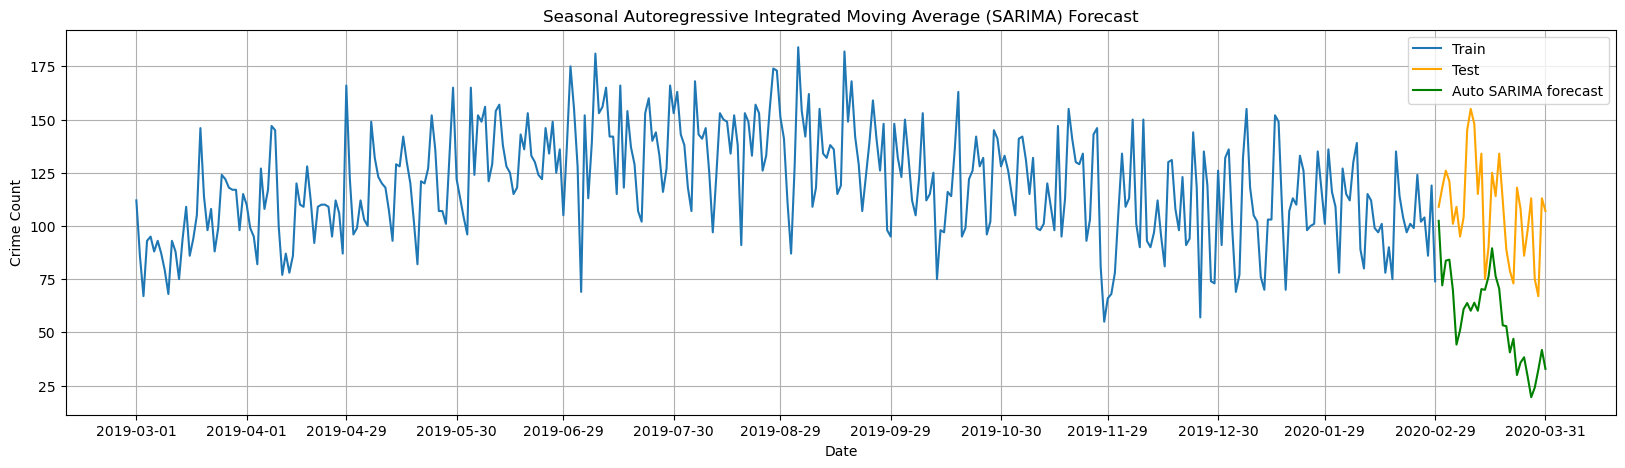

In [ ]:
y_hat_sarima = test1.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train1['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train1['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test1['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='Auto SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()



In [ ]:
#Train 2
SARIMA_model2 = pm.auto_arima(train2s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  358
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1663.998
Date:                           Tue, 01 Apr 2025   AIC                           3339.996
Time:                                   21:11:23   BIC                           3363.160
Sample:                               03-08-2020   HQIC                          3349.215
                                    - 02-28-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1440      0.053      2.721      0.007       0.040       0.248
ar.L2          0.1056      0.065      1.636      0.102      -0.021       0.232
ar.L3          0.1077      0.056      1.909      0.056      -0.003       0.218
ar.S.L7       -0.9831      0.042    -23.162      0.000      -1.066      -0.900
ar.S.L14      -0.5463      0.045    -12.192      0.000      -0.634      -0.458
sigma2       749.1972     49.749     15.060      0.000     651.691     846.703
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 5.89
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.44   Skew:                            -0.02
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model2.predict(n_periods=len(test2))

mse7 = mean_squared_error(test2['Crime_Count'], fcast)
rmse7 = np.sqrt(mse7)
mae7 = mean_absolute_error(test2['Crime_Count'], fcast)
mape7= mean_absolute_percentage_error(test2['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse7}')
print(f'Root Mean Squared Error: {rmse7}')
print(f'Mean Absolute Error: {mae7}')
print(f'Mean Absolute Percentage Error: {mape7}')

Mean Squared Error: 8526.126040888494
Root Mean Squared Error: 92.33702421503789
Mean Absolute Error: 89.81475276524118
Mean Absolute Percentage Error: 0.991178719435355


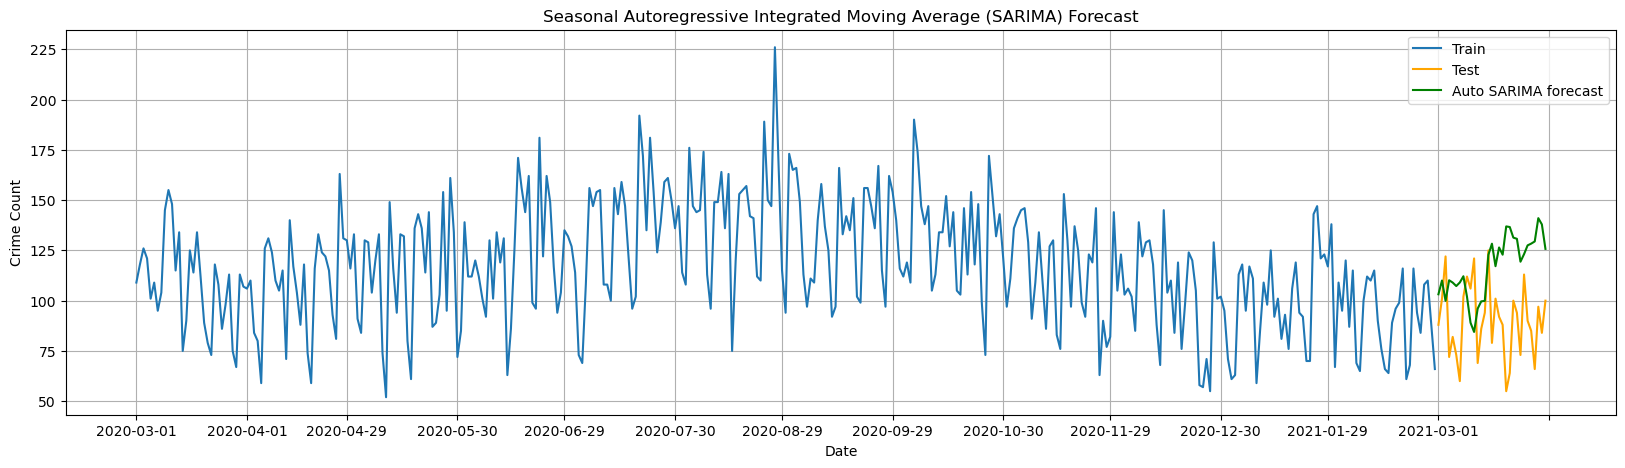

In [ ]:
y_hat_sarima = test2.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train2['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train2['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test2['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='Auto SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

In [ ]:
#Train 3
SARIMA_model3 = pm.auto_arima(train3s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  358
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1609.887
Date:                           Tue, 01 Apr 2025   AIC                           3227.774
Time:                                   21:12:26   BIC                           3243.217
Sample:                               03-08-2021   HQIC                          3233.920
                                    - 02-28-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2468      0.051      4.819      0.000       0.146       0.347
ar.S.L7       -1.0453      0.049    -21.386      0.000      -1.141      -0.950
ar.S.L14      -0.4991      0.049    -10.230      0.000      -0.595      -0.403
sigma2       550.2817     40.741     13.507      0.000     470.431     630.132
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.95   Prob(JB):                         0.86
Heteroskedasticity (H):               1.43   Skew:                             0.04
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model3.predict(n_periods=len(test3))

mse8 = mean_squared_error(test3['Crime_Count'], fcast)
rmse8 = np.sqrt(mse8)
mae8 = mean_absolute_error(test3['Crime_Count'], fcast)
mape8= mean_absolute_percentage_error(test3['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse8}')
print(f'Root Mean Squared Error: {rmse8}')
print(f'Mean Absolute Error: {mae8}')
print(f'Mean Absolute Percentage Error: {mape8}')

Mean Squared Error: 13767.640839132993
Root Mean Squared Error: 117.33559067534877
Mean Absolute Error: 114.77351075729212
Mean Absolute Percentage Error: 1.0551438343285018


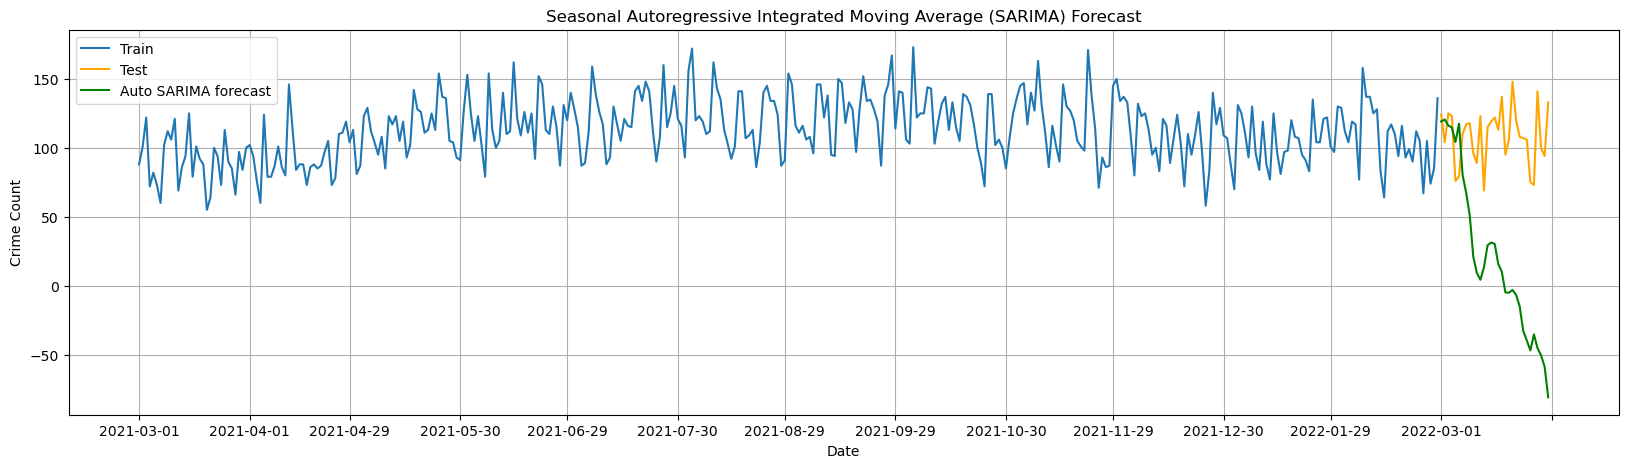

In [ ]:
y_hat_sarima = test3.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train3['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train3['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test3['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='Auto SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

In [ ]:
#Train 4
SARIMA_model4 = pm.auto_arima(train4s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  358
Model:             SARIMAX(4, 0, 1)x(2, 1, [], 7)   Log Likelihood               -1669.045
Date:                            Tue, 01 Apr 2025   AIC                           3354.090
Time:                                    21:13:18   BIC                           3384.977
Sample:                                03-08-2022   HQIC                          3366.383
                                     - 02-28-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6809      0.104     -6.573      0.000      -0.884      -0.478
ar.L2          0.3310      0.067      4.970      0.000       0.200       0.461
ar.L3          0.2364      0.070      3.401      0.001       0.100       0.373
ar.L4          0.1533      0.056      2.714      0.007       0.043       0.264
ma.L1          0.8613      0.082     10.447      0.000       0.700       1.023
ar.S.L7       -0.9894      0.045    -22.064      0.000      -1.077      -0.902
ar.S.L14      -0.5511      0.046    -11.973      0.000      -0.641      -0.461
sigma2       769.2269     57.062     13.481      0.000     657.388     881.066
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.97   Prob(JB):                         0.59
Heteroskedasticity (H):               1.68   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model4.predict(n_periods=len(test4))

mse9 = mean_squared_error(test4['Crime_Count'], fcast)
rmse9 = np.sqrt(mse9)
mae9 = mean_absolute_error(test4['Crime_Count'], fcast)
mape9= mean_absolute_percentage_error(test4['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse9}')
print(f'Root Mean Squared Error: {rmse9}')
print(f'Mean Absolute Error: {mae9}')
print(f'Mean Absolute Percentage Error: {mape9}')

Mean Squared Error: 17032.445724346177
Root Mean Squared Error: 130.50841246581072
Mean Absolute Error: 128.76622873688265
Mean Absolute Percentage Error: 1.0475190306100879


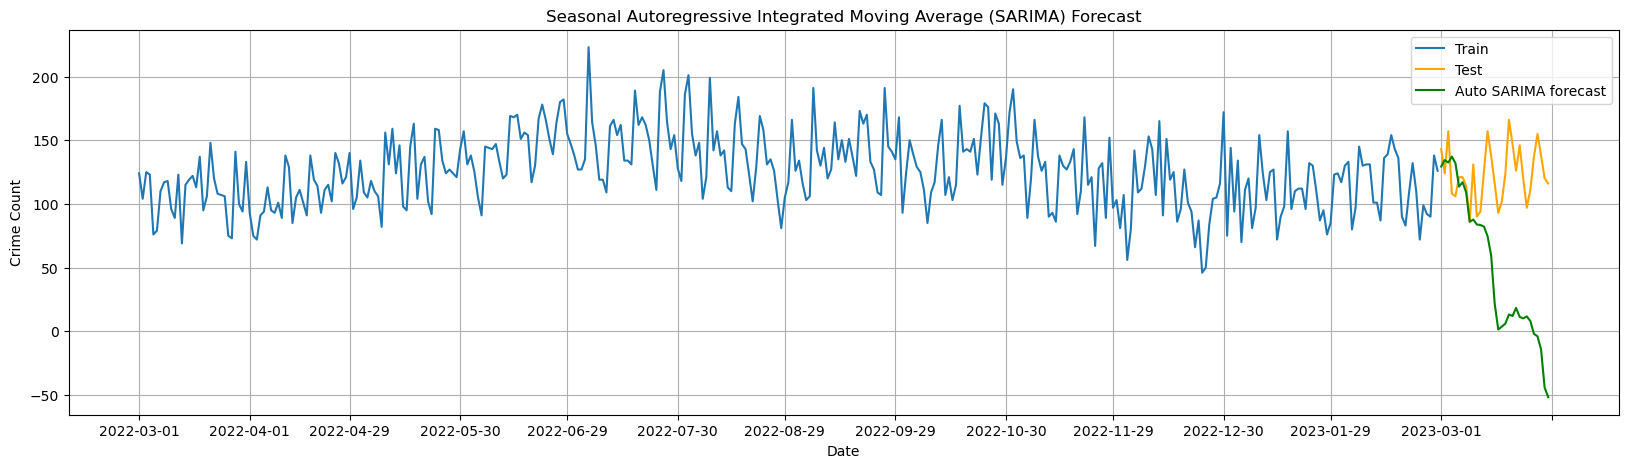

In [ ]:
y_hat_sarima = test4.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train4['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train4['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test4['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='Auto SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

In [ ]:
#Train 5
SARIMA_model5 = pm.auto_arima(train5s1["Crime_Count"], start_p=1, start_q=1,
                         test='adf',
                         max_p=4, max_q=4, 
                         m=7, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

SARIMA_model5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  388
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 7)   Log Likelihood               -1851.091
Date:                           Tue, 01 Apr 2025   AIC                           3710.183
Time:                                   21:13:49   BIC                           3725.954
Sample:                               03-08-2023   HQIC                          3716.440
                                    - 03-29-2024                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1641      0.050      3.279      0.001       0.066       0.262
ar.S.L7       -0.9639      0.038    -25.694      0.000      -1.037      -0.890
ar.S.L14      -0.4788      0.039    -12.415      0.000      -0.554      -0.403
sigma2       952.7727     56.718     16.798      0.000     841.607    1063.939
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.35
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                            -0.25
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#FIT MODEL AND CALCULATE MSE
fcast = SARIMA_model5.predict(n_periods=len(test5))

mse10 = mean_squared_error(test5['Crime_Count'], fcast)
rmse10 = np.sqrt(mse10)
mae10 = mean_absolute_error(test5['Crime_Count'], fcast)
mape10= mean_absolute_percentage_error(test5['Crime_Count'], fcast)

print(f'Mean Squared Error: {mse10}')
print(f'Root Mean Squared Error: {rmse10}')
print(f'Mean Absolute Error: {mae10}')
print(f'Mean Absolute Percentage Error: {mape10}')

Mean Squared Error: 14144.292719115458
Root Mean Squared Error: 118.92978062333866
Mean Absolute Error: 115.89282019316573
Mean Absolute Percentage Error: 1.0872208244540427


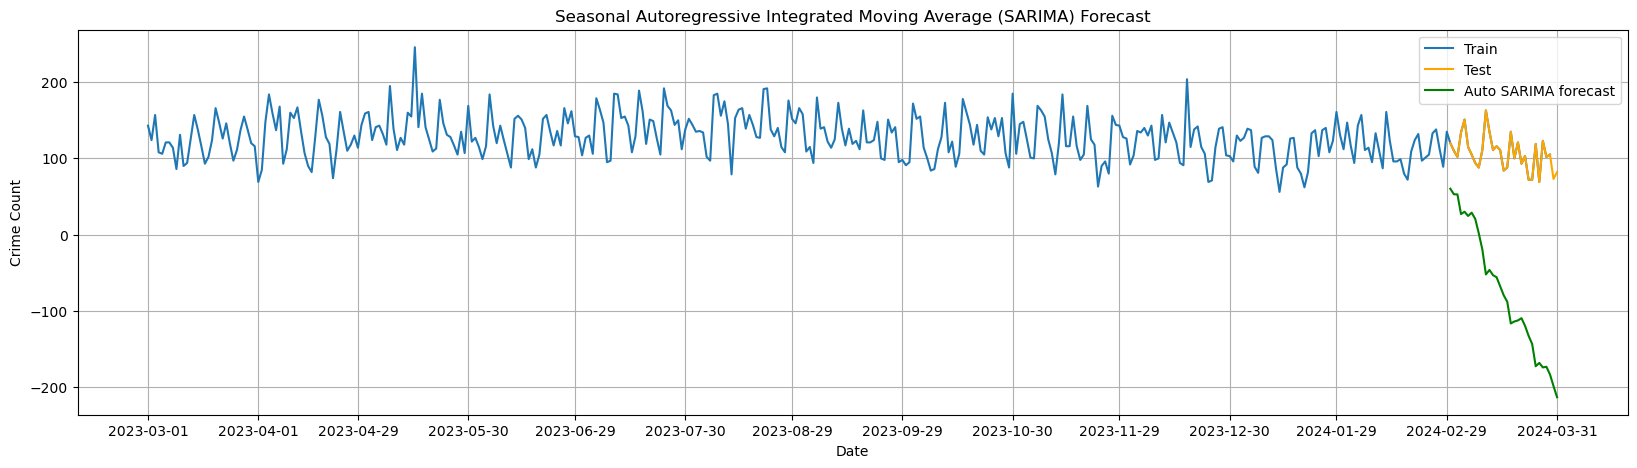

In [ ]:
y_hat_sarima = test5.copy()
y_hat_sarima['sarima_forecast'] = fcast.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima['sarima_forecast'] = train5['Crime_Count'].iloc[-7] + y_hat_sarima['sarima_forecast'].cumsum()

fig, ax=plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot the training data
plt.plot(train5['Crime_Count'], label='Train')

# Plot the test data
plt.plot(test5['Crime_Count'], label='Test', color='orange')

# Plot the SARIMA forecast for the test period
plt.plot(y_hat_sarima['sarima_forecast'], label='Auto SARIMA forecast', color='green')

months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

plt.legend(loc='best')
plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')

# Show the plot
plt.show()

In [574]:
#Model Comparison
data = {'Auto SARIMA Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5'],
        'Parameters':['(1,0,0)(2,1,0,7)','(3,0,0)(2,1,0,7)','(1,0,0)(2,1,0,7)','(4,0,1)(2,1,0,7)','(1,0,0)(2,1,0,7)'],
        'MSE': [mse6, mse7, mse8, mse9, mse10],
        'RMSE':[rmse6,rmse7,rmse8,rmse9, rmse10],
        'MAE':[mae6,mae7,mae8,mae9,mae10],
        'MAPE':[mape6,mape7,mape8,mape9,mape10]}

# Create DataFrame
df = pd.DataFrame(data)

df.style \
  .format(precision=3, thousands="", decimal=".") \
  .format_index(str.upper, axis=1) \
  .relabel_index(['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5'], axis=0)

## FORECAST ALL FOR 2025

In [564]:
# Create Data without March 2025 (ONLY MARCH2024-FEBRUARY2025)
final_range = pd.date_range(start='2024-3-1', end='2025-2-28')
final = unidf[unidf['date'].isin(final_range)]

#March 2025 actual data
lastMarch = unidf[(unidf['date'].dt.year ==2025 ) & (unidf['date'].dt.month ==3)]

#March2025 empty
march=pd.DataFrame()

month = '2025-03'
period = pd.Period(month, freq='M')
result= pd.date_range(
    start=period.start_time, 
    end=period.end_time, 
    freq='D'
).to_frame(index=True, name='date')

march['dates']=result

#set date time index
lastMarch.index=pd.to_datetime(lastMarch.index)
final.index=pd.to_datetime(final.index)

In [565]:
#Difference the Data by 7
finals1= final.copy()
finals1['Crime_Count']=final['Crime_Count'] - final['Crime_Count'].shift(7)
finals1=finals1.dropna()

# 1 Fit Three Models:
FinalMod_1 = SARIMAX(finals1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
FinalMod_2 = SARIMAX(finals1['Crime_Count'], order=(1,0,2), seasonal_order=(1,1,1,7)).fit(dis=-1)
FinalMod_3 = SARIMAX(finals1['Crime_Count'], order=(3,0,0), seasonal_order=(2,1,0,7)).fit(dis=-1)

#forecast Three Models
fcast1 = FinalMod_1.predict(n_periods=len(march))
fcast2 = FinalMod_2.predict(n_periods=len(march))
fcast3 = FinalMod_2.predict(n_periods=len(march))


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

In [566]:
#Difference the Data by 7
finals1= final.copy()
finals1['Crime_Count']=final['Crime_Count'] - final['Crime_Count'].shift(7)
finals1=finals1.dropna()

# 1 Fit Three Models:
FinalMod_1 = SARIMAX(finals1['Crime_Count'], order=(1,0,0), seasonal_order=(1,1,1,7)).fit(dis=-1)
FinalMod_2 = SARIMAX(finals1['Crime_Count'], order=(1,0,2), seasonal_order=(1,1,1,7)).fit(dis=-1)
FinalMod_3 = SARIMAX(finals1['Crime_Count'], order=(3,0,0), seasonal_order=(2,1,0,7)).fit(dis=-1)

#forecast Three Models
fcast1 = FinalMod_1.forecast(len(march))
fcast2 = FinalMod_2.forecast(len(march))
fcast3 = FinalMod_3.forecast(len(march))

#make forecast df for each
y_hat_sarima1 = march.copy()
y_hat_sarima1['sarima_forecast'] = fcast1.values

y_hat_sarima2 = march.copy()
y_hat_sarima2['sarima_forecast'] = fcast2.values

y_hat_sarima3 = march.copy()
y_hat_sarima3['sarima_forecast'] = fcast3.values

# Reverse differencing: cumulatively sum and add back last known value
y_hat_sarima1['sarima_forecast'] = final['Crime_Count'].iloc[-7] + y_hat_sarima1['sarima_forecast'].cumsum()
y_hat_sarima2['sarima_forecast'] = final['Crime_Count'].iloc[-7] + y_hat_sarima2['sarima_forecast'].cumsum()
y_hat_sarima3['sarima_forecast'] = final['Crime_Count'].iloc[-7] + y_hat_sarima3['sarima_forecast'].cumsum()


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be 

In [567]:
y_hat_sarima1.index = march.index
y_hat_sarima2.index = march.index
y_hat_sarima3.index = march.index
print(y_hat_sarima1.index)
print(march.index)

DatetimeIndex(['2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04',
               '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-08',
               '2025-03-09', '2025-03-10', '2025-03-11', '2025-03-12',
               '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16',
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-22', '2025-03-23', '2025-03-24',
               '2025-03-25', '2025-03-26', '2025-03-27', '2025-03-28',
               '2025-03-29', '2025-03-30', '2025-03-31'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2025-03-01', '2025-03-02', '2025-03-03', '2025-03-04',
               '2025-03-05', '2025-03-06', '2025-03-07', '2025-03-08',
               '2025-03-09', '2025-03-10', '2025-03-11', '2025-03-12',
               '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16',
               '2025-03-17', '2025-03-18', '2025-03-19', '2025-03-20',
               '2025-03-21', '2025-03-22',

In [568]:
print(y_hat_sarima1.index.tz)
print(march.index.tz)
print(lastMarch.index.tz)
print(final.index.tz)

None
None
None
None


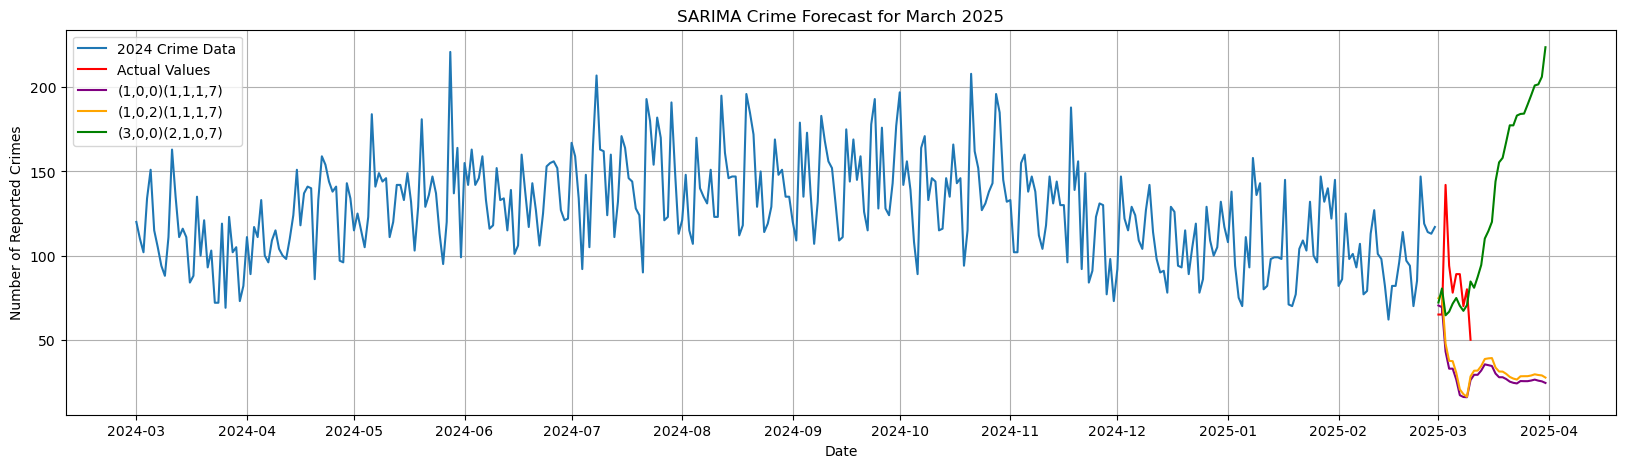

In [572]:



# #plot
# fig, ax=plt.subplots(figsize=(20, 5))
# plt.grid(True)

# # Plot the data
# plt.plot(final['Crime_Count'], label='2024 Crime Data')

# # Plot the March 2025 Actual
# plt.plot(lastMarch['Crime_Count'], label='Actual Values', color='red')

# # Plot the SARIMA forecast for the test period
# plt.plot(y_hat_sarima1['sarima_forecast'], label='(1,0,0)(1,1,1,7)', color='purple')

# plt.plot(y_hat_sarima2['sarima_forecast'], label='(1,0,2)(1,1,1,7)', color='orange')

# plt.plot(y_hat_sarima3['sarima_forecast'], label='(3,0,0)(2,1,0,7)', color='green')

# months = mdates.MonthLocator()  
# ax.xaxis.set_major_locator(months)

# plt.legend(loc='best')
# plt.title('Seasonal Autoregressive Integrated Moving Average (SARIMA) Forecast')
# plt.xlabel('Date')
# plt.ylabel('Crime Count')

# # Show the plot
# plt.show()

# Create figure
fig, ax = plt.subplots(figsize=(20, 5))
plt.grid(True)

# Plot historical crime data
plt.plot(final.index, final['Crime_Count'], label='2024 Crime Data')

# Plot actual March 2025 values
plt.plot(lastMarch.index, lastMarch['Crime_Count'], label='Actual Values', color='red')

# Plot SARIMA model forecasts
plt.plot(y_hat_sarima1.index, y_hat_sarima1['sarima_forecast'], label='(1,0,0)(1,1,1,7)', color='purple')
plt.plot(y_hat_sarima2.index, y_hat_sarima2['sarima_forecast'], label='(1,0,2)(1,1,1,7)', color='orange')
plt.plot(y_hat_sarima3.index, y_hat_sarima3['sarima_forecast'], label='(3,0,0)(2,1,0,7)', color='green')

# Format x-axis for months
months = mdates.MonthLocator()  
ax.xaxis.set_major_locator(months)

# Labels and title
plt.legend(loc='best')
plt.title('SARIMA Crime Forecast for March 2025')
plt.xlabel('Date')
plt.ylabel('Number of Reported Crimes')

# Show plot
plt.show()